In [1]:
import numpy as np
import pandas as pd#calculate pearson coefficient matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.feature_selection import mutual_info_regression 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
data_video=pd.read_csv('transcoding_mesurment.tsv',sep='\t')#Please modify this line to absolute path to "transcoding_measurement.tsv" file
print(data_video)

                id   duration  codec  width  height  bitrate  framerate    i  \
0      04t6-jw9czg  130.35667  mpeg4    176     144    54590  12.000000   27   
1      04t6-jw9czg  130.35667  mpeg4    176     144    54590  12.000000   27   
2      04t6-jw9czg  130.35667  mpeg4    176     144    54590  12.000000   27   
3      04t6-jw9czg  130.35667  mpeg4    176     144    54590  12.000000   27   
4      04t6-jw9czg  130.35667  mpeg4    176     144    54590  12.000000   27   
...            ...        ...    ...    ...     ...      ...        ...  ...   
68779  ZWEN-71BqPs  972.27100   h264    480     360   278822  29.000000  560   
68780  zWQN-bqqg0o  129.88100    vp8    640     480   639331  30.162790   36   
68781  zX17-vi0sqQ  249.68000    vp8    320     240   359345  25.068274  129   
68782  zyiT-TzxIpk  183.62334   h264   1280     720  2847539  29.000000   98   
68783  zZKo-QsY86U  294.61334  mpeg4    176     144    55242  12.000000   61   

           p  b  ...    p_size  b_size 

In [3]:
print(data_video['id'])
print(data_video['id'].shape)
le=LabelEncoder()
le.fit_transform(data_video['id'])

0        04t6-jw9czg
1        04t6-jw9czg
2        04t6-jw9czg
3        04t6-jw9czg
4        04t6-jw9czg
            ...     
68779    ZWEN-71BqPs
68780    zWQN-bqqg0o
68781    zX17-vi0sqQ
68782    zyiT-TzxIpk
68783    zZKo-QsY86U
Name: id, Length: 68784, dtype: object
(68784,)


array([  10,   10,   10, ..., 1087, 1098, 1088])

In [4]:
data_video['id']=le.fit_transform(data_video['id'])#id discard
data_video['codec']=le.fit_transform(data_video['codec'])
data_video['o_codec']=le.fit_transform(data_video['o_codec'])
print(data_video)
video_array=np.array(data_video)
feature_name=[]
for col in data_video.columns:
    print(col)
    feature_name.append(col)

         id   duration  codec  width  height  bitrate  framerate    i      p  \
0        10  130.35667      2    176     144    54590  12.000000   27   1537   
1        10  130.35667      2    176     144    54590  12.000000   27   1537   
2        10  130.35667      2    176     144    54590  12.000000   27   1537   
3        10  130.35667      2    176     144    54590  12.000000   27   1537   
4        10  130.35667      2    176     144    54590  12.000000   27   1537   
...     ...        ...    ...    ...     ...      ...        ...  ...    ...   
68779   615  972.27100      1    480     360   278822  29.000000  560  28580   
68780  1086  129.88100      3    640     480   639331  30.162790   36   3855   
68781  1087  249.68000      3    320     240   359345  25.068274  129   6113   
68782  1098  183.62334      1   1280     720  2847539  29.000000   98   5405   
68783  1088  294.61334      2    176     144    55242  12.000000   61   3474   

       b  ...    p_size  b_size      si

c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


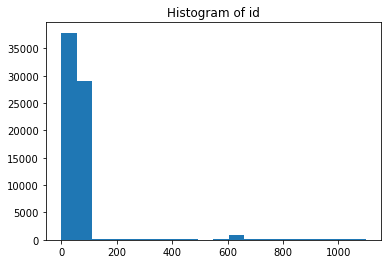

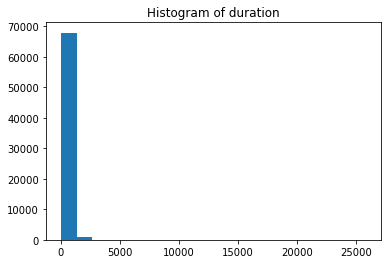

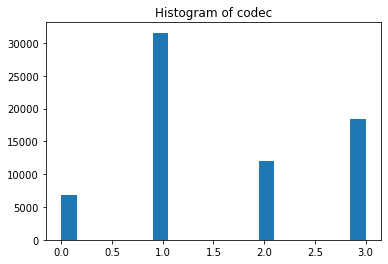

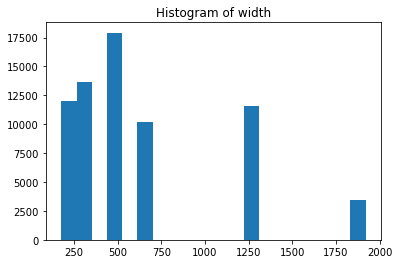

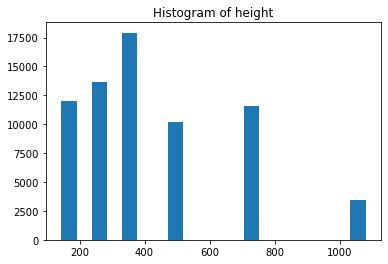

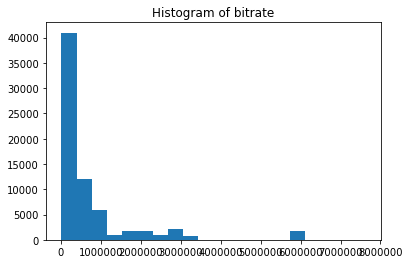

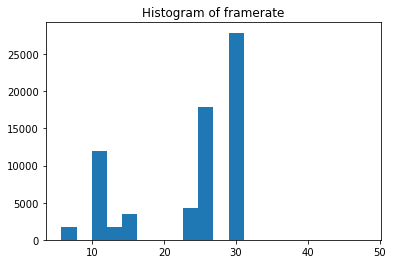

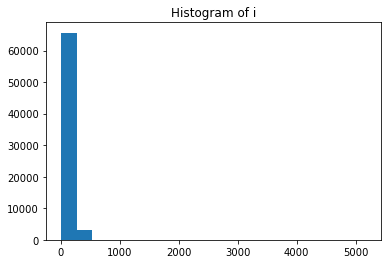

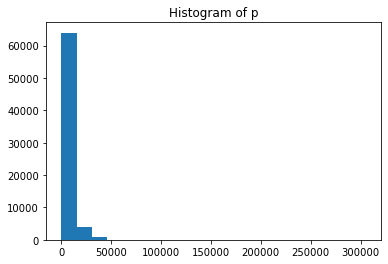

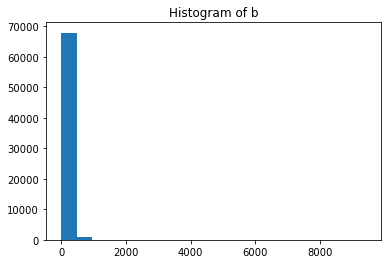

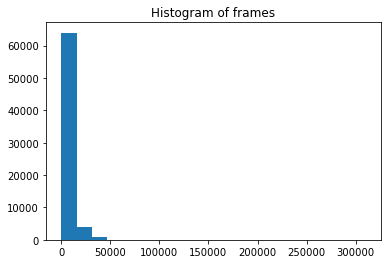

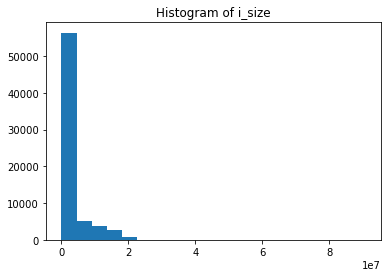

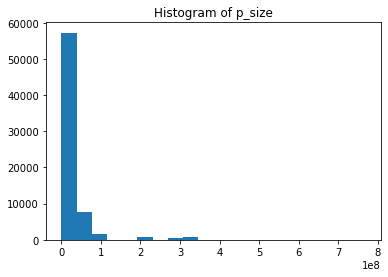

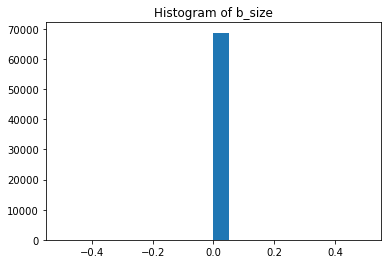

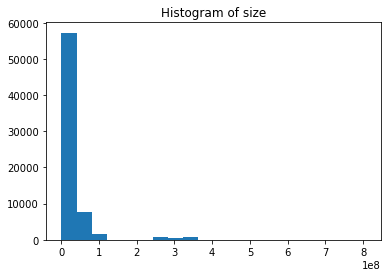

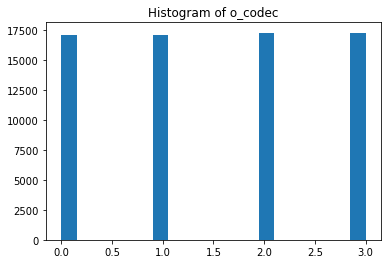

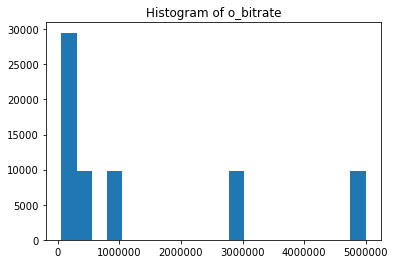

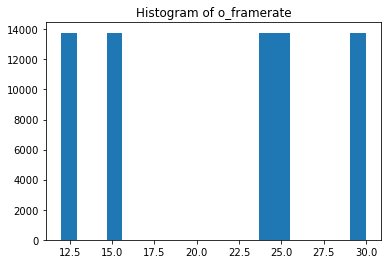

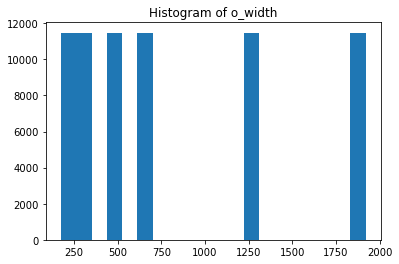

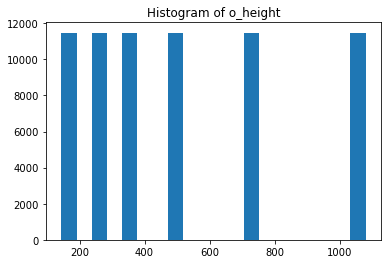

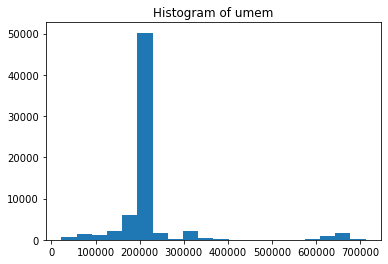

<Figure size 432x288 with 0 Axes>

In [5]:
for i in range(21):
    plt.hist(video_array[:,i],bins=20)
    plt.title('Histogram of {}'.format(feature_name[i]))
    plt.figure()

In [6]:
pearson_matrix=np.corrcoef(video_array.astype(float),rowvar=False)
kk=pd.DataFrame(pearson_matrix)
print(kk)

          0         1         2         3         4         5         6   \
0   1.000000 -0.021980  0.017892 -0.084538 -0.093973 -0.052827 -0.130368   
1  -0.021980  1.000000  0.270641  0.072634  0.050446  0.004759 -0.030559   
2   0.017892  0.270641  1.000000  0.184339  0.166723 -0.024989 -0.061211   
3  -0.084538  0.072634  0.184339  1.000000  0.990467  0.815328  0.396052   
4  -0.093973  0.050446  0.166723  0.990467  1.000000  0.799082  0.456310   
5  -0.052827  0.004759 -0.024989  0.815328  0.799082  1.000000  0.255464   
6  -0.130368 -0.030559 -0.061211  0.396052  0.456310  0.255464  1.000000   
7  -0.025007  0.773659 -0.103392  0.077829  0.093377  0.059262  0.263127   
8  -0.049055  0.850175  0.268876  0.238482  0.234470  0.112427  0.332138   
9   0.025436  0.061523 -0.061178 -0.063823 -0.069076 -0.045938  0.026759   
10 -0.048399  0.851053  0.263147  0.235592  0.231766  0.111137  0.331983   
11 -0.026577  0.426600  0.157220  0.601446  0.592107  0.446320  0.306534   
12 -0.022808

c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [7]:
print(np.abs(pearson_matrix[:,21]))
print(np.argsort(np.abs(pearson_matrix[:,21])))

[0.01269964 0.00553252 0.01842265 0.12986109 0.12847852 0.15519994
 0.07933609 0.01848918 0.03320061 0.00513953 0.03311458 0.06471148
 0.09764442        nan 0.09709582 0.07050064 0.15547883 0.10404252
 0.52338766 0.51964868 0.66330136 1.        ]
[ 9  1  0  2  7 10  8 11 15  6 14 12 17  4  3  5 16 19 18 20 21 13]


In [8]:
#print out feature names
i=0
for col in data_video.columns:
    print(i)
    i+=1
    print(col)

0
id
1
duration
2
codec
3
width
4
height
5
bitrate
6
framerate
7
i
8
p
9
b
10
frames
11
i_size
12
p_size
13
b_size
14
size
15
o_codec
16
o_bitrate
17
o_framerate
18
o_width
19
o_height
20
umem
21
utime


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


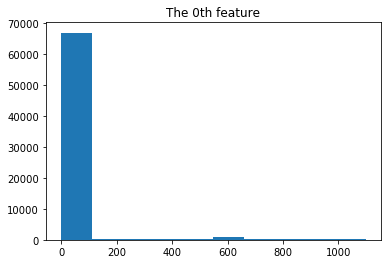

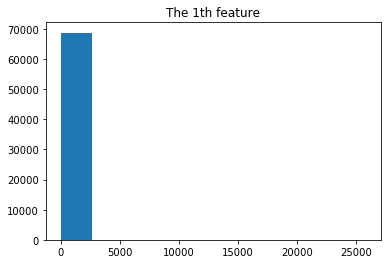

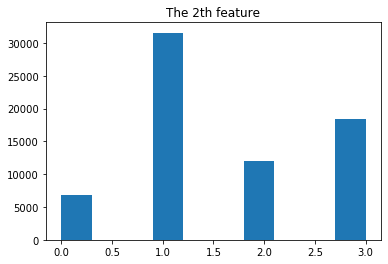

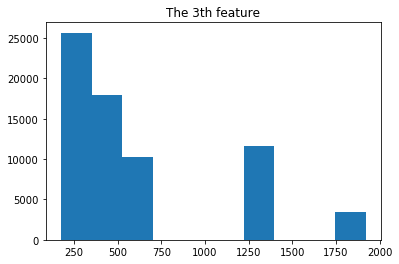

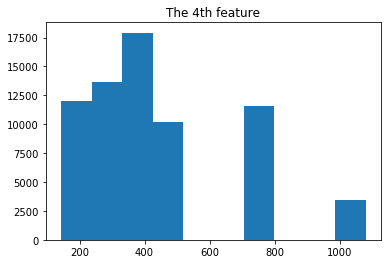

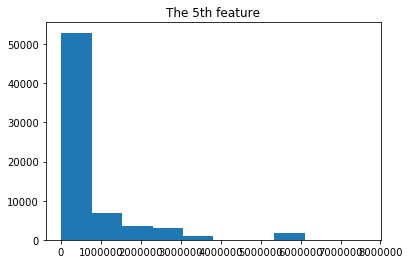

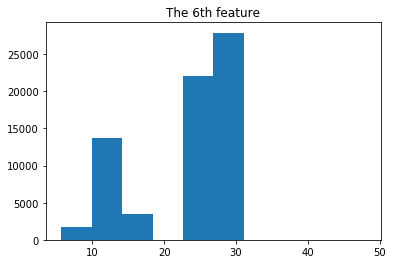

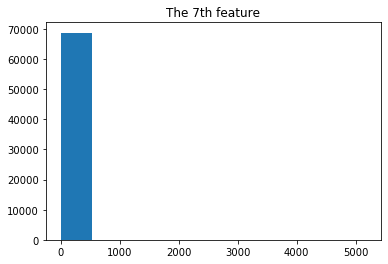

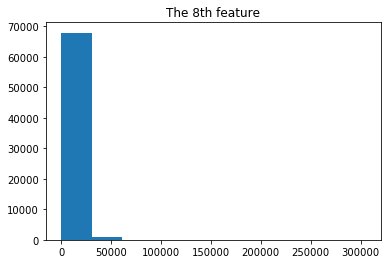

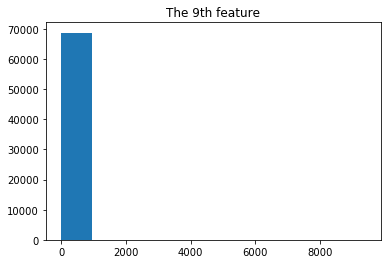

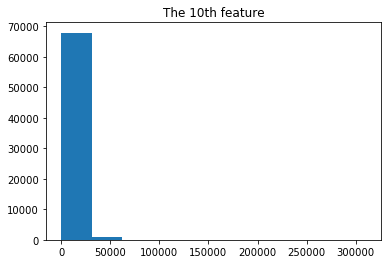

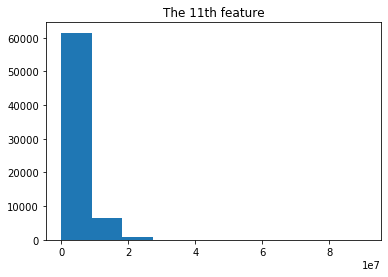

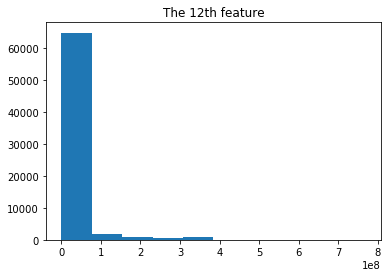

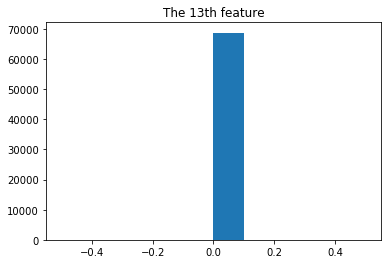

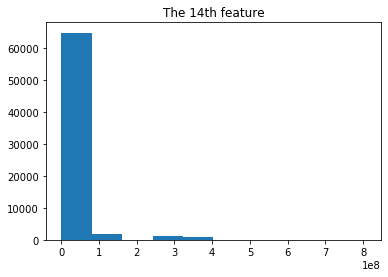

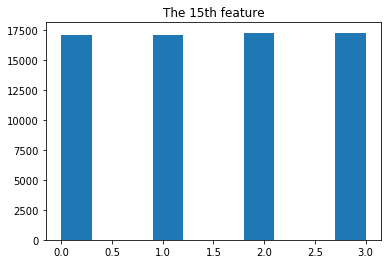

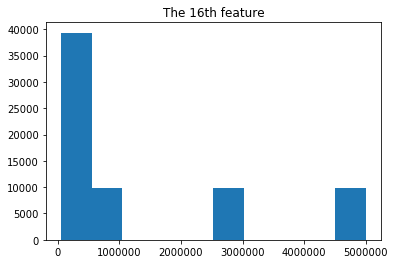

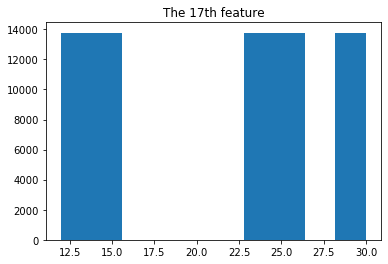

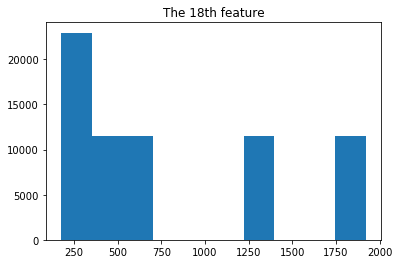

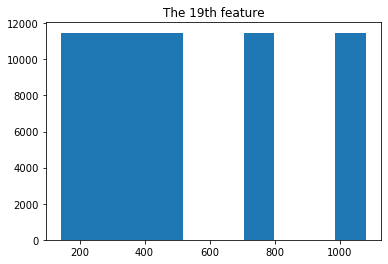

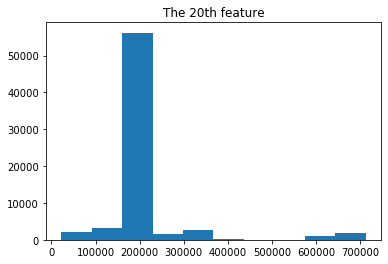

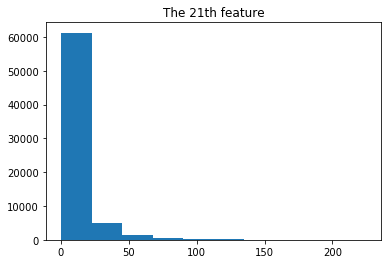

<Figure size 432x288 with 0 Axes>

In [9]:
for i in range(22):
    plt.hist(video_array[:,i])
    plt.title('The %ith feature' %i)
    plt.figure()

# Question 5

mean transcodin time is 9.996355
median transcoding time is 4.408000


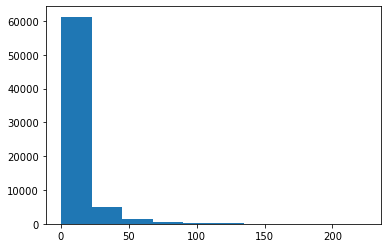

In [10]:
trans_time=video_array[:,21]
plt.hist(trans_time)
print('mean transcodin time is %f' %np.mean(trans_time))
print('median transcoding time is %f' %np.median(trans_time))

# Question 7
Standardize feature columns and prepare them for training

In [11]:

o_width=data_video['o_width']
o_height=data_video['o_height']
o_width_array=np.array(o_width)
o_height_array=np.array(o_height)
o_area=[]
for i in range(o_height_array.shape[0]):
    o_area.append(np.multiply(o_width_array[i],o_height_array[i]))
o_area=np.array(o_area)
print(o_area.shape)
print(o_area)

i_width=data_video['width']
i_height=data_video['height']
i_width_array=np.array(i_width)
i_height_array=np.array(i_height)
i_area=[]
for i in range(i_height_array.shape[0]):
    i_area.append(np.multiply(i_width_array[i],i_height_array[i]))
i_area=np.array(i_area)
print(i_area)
print(i_area.shape)


(68784,)
[ 25344  76800 172800 ...  25344  76800  25344]
[ 25344  25344  25344 ...  76800 921600  25344]
(68784,)


In [12]:
one_to_three_features=[]
data_array=np.array(data_video)
one_to_three_features=data_array[:,:3]
print(one_to_three_features.shape)
five_to_seventeen_features=data_array[:,5:18]
print(five_to_seventeen_features.shape)
feature_array=np.zeros((68784,18),dtype=np.float64)
feature_array[:,:3]=one_to_three_features
feature_array[:,3:16]=five_to_seventeen_features
feature_array[:,16]=o_area
feature_array[:,17]=i_area
print(np.shape(feature_array))
print(feature_array[1])
print(feature_array[:,[2,13]])

(68784, 3)
(68784, 13)
(68784, 18)
[1.0000000e+01 1.3035667e+02 2.0000000e+00 5.4590000e+04 1.2000000e+01
 2.7000000e+01 1.5370000e+03 0.0000000e+00 1.5640000e+03 6.4483000e+04
 8.2505400e+05 0.0000000e+00 8.8953700e+05 2.0000000e+00 5.6000000e+04
 1.2000000e+01 7.6800000e+04 2.5344000e+04]
[[2. 2.]
 [2. 2.]
 [2. 2.]
 ...
 [3. 0.]
 [1. 2.]
 [2. 1.]]


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


-2.0888865577181788e-13
1.0000000000000362
-1.12258810450863e-14
1.0000000000000175
-4.9485111674011166e-14
0.9999999999997851
-3.7401422580868356e-14
0.9999999999996867
3.5740349193013275e-14
1.0000000000000826
-7.103774548259852e-14
0.9999999999999085
7.931501466307441e-14
0.9999999999999893
5.5985197610416223e-14
1.0000000000000104
-4.442090385272959e-14
0.999999999999934
6.438518788447244e-14
0.9999999999999863
1.923870073097829e-15
1.000000000000031
0.0
0.0
4.2814373173132437e-14
0.9999999999999568
-7.346737521408805e-16
1.0000000000001987
7.89629662734096e-16
0.9999999999999962
5.209964945054178e-16
1.0000000000000975
4.57518285746901e-16
1.000000000000067
6.220513236349646e-14
1.0000000000001006
(68784, 18)
[-0.5826146  -0.55976783 -0.5451161  ... -0.57392289 -0.28262661
 -0.42964059]
[0.612 0.98  1.216 ... 0.752 5.444 3.076]
1.1982867723332697e-17
1.0


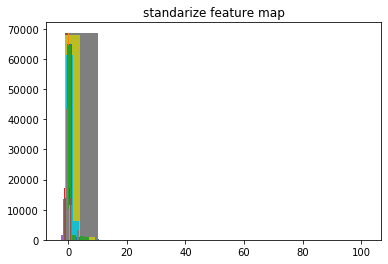

In [13]:
video_feature=feature_array
video_label=scale(data_array[:,21])
video_feature_scaled=scale(video_feature)
#check mean of standarized feature map
for j in range(video_feature_scaled.shape[1]):
    print(np.mean(video_feature_scaled[:,j]))
    print(np.std(video_feature_scaled[:,j]))
    plt.hist(video_feature_scaled[:,j])
    plt.title('standarize feature map')
print(video_feature.shape)
print(video_label)
print(data_array[:,21])
print(np.mean(video_label))
print(np.std(video_label))

In [14]:
#one hot encoding
print(video_feature_scaled.shape)
#performe one hot encoding for categorical data
video_feature_scaled_categorical=video_feature_scaled[:,[2,13]]
print(video_feature_scaled_categorical)
enc=OneHotEncoder()
video_feature_onehot_part=enc.fit_transform(video_feature_scaled_categorical)

print(type(video_feature_onehot_part))
k=video_feature_onehot_part.todense()
print(type(k))
print(k.shape)
video_feature_scaled_num=video_feature_scaled[:,[0,1,3,4,5,6,7,8,9,10,11,12,14,15,16,17]]
print(video_feature_scaled_num.shape)
video_feature_onehot=np.hstack((k,video_feature_scaled_num))
print(video_feature_onehot.shape)

(68784, 18)
[[ 0.39586936  0.44297926]
 [ 0.39586936  0.44297926]
 [ 0.39586936  0.44297926]
 ...
 [ 1.41045606 -1.34547444]
 [-0.61871734  0.44297926]
 [ 0.39586936 -0.45124759]]
<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.matrix'>
(68784, 8)
(68784, 16)
(68784, 24)


# Question 8
Feature Selection

In [15]:
FS=SelectKBest(score_func=f_regression,k=4)
f_score=FS.fit(video_feature_scaled,video_label)
print(f_score.scores_)

[1.10950090e+01 2.10539899e+00 2.33521295e+01 1.69764467e+03
 4.35670896e+02 2.35211437e+01 7.59007126e+01 1.81691098e+00
 7.55074542e+01 2.89241036e+02 6.62110205e+02            nan
 6.54620570e+02 3.43577626e+02 1.70390279e+03 7.52702473e+02
 2.63155945e+04 1.23769319e+03]


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [16]:
video_feature_red=[]
video_feature_red_withlabel=[]
for i in range(video_feature_scaled.shape[1]):
    if np.array(f_score.scores_)[i]>=500:
        video_feature_red.append(video_feature_scaled[:,i])
        video_feature_red_withlabel.append(video_feature_scaled[:,i])
video_feature_red=np.transpose(np.array(video_feature_red))
video_feature_red_withlabel.append(video_label)
video_feature_red_withlabel=np.transpose(np.array(video_feature_red_withlabel))
print(video_feature_red.shape)
print(video_feature_red_withlabel.shape)

(68784, 7)
(68784, 8)


In [17]:
#without scaling 
video_feature_red_noscale=[]
video_feature_red_withlabel_noscale=[]
for i in range(video_feature.shape[1]):
    if np.array(f_score.scores_)[i]>=500:
        video_feature_red_noscale.append(video_feature[:,i])
        video_feature_red_withlabel_noscale.append(video_feature[:,i])
video_feature_red_noscale=np.transpose(np.array(video_feature_red_noscale))
video_feature_red_withlabel_noscale.append(video_label)
video_feature_red_withlabel_noscale=np.transpose(np.array(video_feature_red_withlabel_noscale))
print(video_feature_red_noscale.shape)
print(video_feature_red_withlabel_noscale.shape)

(68784, 7)
(68784, 8)


In [18]:
#one hot
FS_onehot=SelectKBest(score_func=f_regression,k=4)
f_score_onehot=FS_onehot.fit(video_feature_onehot,video_label)
print(f_score_onehot.scores_)
video_feature_red_onehot=[]
video_feature_red_withlabel_onehot=[]
for i in range(video_feature_onehot.shape[1]):
    if np.array(f_score_onehot.scores_)[i]>=500:
        video_feature_red_onehot.append(video_feature_onehot[:,i])
        video_feature_red_withlabel_onehot.append(video_feature_onehot[:,i])
video_feature_red_onehot=np.transpose(np.array(video_feature_red_onehot)).reshape(68784,len(video_feature_red_onehot))
print(video_feature_red_onehot.shape)
video_feature_red_withlabel_onehot.append(scale(video_label).reshape([68784,1]))
video_feature_red_withlabel_onehot=np.hstack((video_feature_red_onehot,video_label.reshape(68784,1)))

print(video_feature_red_withlabel_onehot.shape)

[1.39695981e+00 1.94165314e+02 4.51839701e+02 1.09442690e+01
 5.35016483e+03 1.29224641e+04 2.05653794e+03 1.22451068e+02
 1.10950090e+01 2.10539899e+00 1.69764467e+03 4.35670896e+02
 2.35211437e+01 7.59007126e+01 1.81691098e+00 7.55074542e+01
 2.89241036e+02 6.62110205e+02            nan 6.54620570e+02
 1.70390279e+03 7.52702473e+02 2.63155945e+04 1.23769319e+03]
(68784, 10)
(68784, 11)


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


# Linear Regression

# Question 9
Explain how each regularization scheme aﬀects the learned hypotheses.

In [19]:
#Linear Regression without regularization
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [20]:
def evaluation(X_train):
    kf=KFold(10,shuffle=True)#defin 10 fold spliter
    RMSE_val=[]
    RMSE_train=[]
    for train_data, test_data in kf.split(X_train):
        train_data=X_train[train_data]
        test_data=X_train[test_data]
        LR=LinearRegression()
        train_data=np.array(train_data)
        test_data=np.array(test_data)
        train_data_feature=train_data[:,:train_data.shape[1]-1]#split feature and label
        train_data_label=train_data[:,train_data.shape[1]-1]
        test_data_feature=test_data[:,:test_data.shape[1]-1]
        test_data_label=test_data[:,test_data.shape[1]-1]
        mdl=LR.fit(train_data_feature,train_data_label)
        pred_train=LR.predict(train_data_feature)
        RMSE_train_sub=np.sqrt(mean_squared_error(train_data_label,pred_train))
        RMSE_train.append(RMSE_train_sub)
        RMSE_train_ave=np.mean(RMSE_train)
        pred_val=LR.predict(test_data_feature)#prediction
        RMSE_val_sub=np.sqrt(mean_squared_error(test_data_label,pred_val))
        RMSE_val.append(RMSE_val_sub)
        RMSE_val_ave=np.mean(RMSE_val)
    plt.plot(pred_val)
    plt.plot(test_data_label)
    plt.legend(['pred','true'])
    plt.title('Prediction and True for Linear Regressor without Reg')
    plt.figure()
    plt.plot(pred_train)
    plt.plot(train_data_label)
    plt.legend(['pred','true'])
    plt.title('Train Figure')
    plt.show()
    print('The average RMSE for training is {}'.format(RMSE_train_ave))
    print('The average RMSE for validation is {}'.format(RMSE_val_ave))
    return RMSE_train_ave,RMSE_val_ave

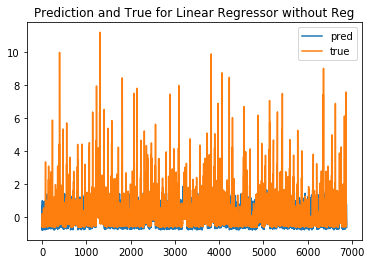

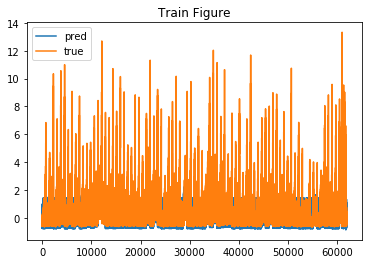

The average RMSE for training is 0.8148949820294981
The average RMSE for validation is 0.8147713662797212


In [21]:
[RMSE_train,RMSE_val]=evaluation(video_feature_red_withlabel)

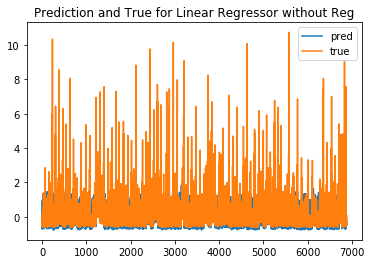

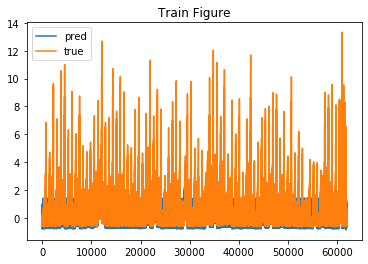

The average RMSE for training is 0.814879751800642
The average RMSE for validation is 0.8142513849743083


In [22]:
#no scaling
[RMSE_train,RMSE_val]=evaluation(video_feature_red_withlabel_noscale)

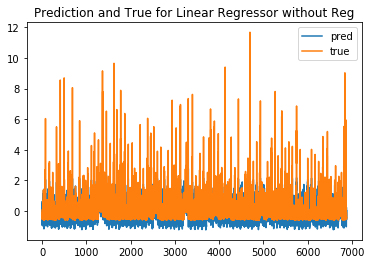

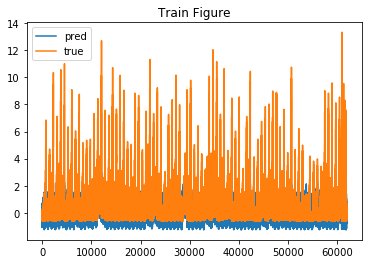

The average RMSE for training is 0.6834090680992344
The average RMSE for validation is 0.6833209694766793


In [23]:
#one hot with scaling
[RMSE_train,RMSE_val]=evaluation(video_feature_red_withlabel_onehot)

In [24]:
#lasso
from sklearn.linear_model import Lasso

In [31]:
def evaluation_lasso(X_train,alpha):
    kf=KFold(10,shuffle=True)#defin 10 fold spliter
    RMSE_val=[]
    RMSE_train=[]
    for train_data, test_data in kf.split(X_train):
        train_data=X_train[train_data]
        test_data=X_train[test_data]
        LS=Lasso(alpha=alpha)
        train_data=np.array(train_data)
        test_data=np.array(test_data)
        train_data_feature=train_data[:,:train_data.shape[1]-1]#split feature and label
        train_data_label=train_data[:,train_data.shape[1]-1]
        test_data_feature=test_data[:,:test_data.shape[1]-1]
        test_data_label=test_data[:,test_data.shape[1]-1]
        mdl=LS.fit(train_data_feature,train_data_label)
        pred_train=LS.predict(train_data_feature)
        RMSE_train_sub=np.sqrt(mean_squared_error(train_data_label,pred_train))
        RMSE_train.append(RMSE_train_sub)
        pred_val=LS.predict(test_data_feature)#prediction
        RMSE_val_sub=np.sqrt(mean_squared_error(test_data_label,pred_val))
        RMSE_val.append(RMSE_val_sub)
    RMSE_train_ave=np.mean(RMSE_train)
    RMSE_val_ave=np.mean(RMSE_val)
        #eee=np.sqrt(mean_squared_error(np.random.rand(len(pred_val)),test_data_label))
        #print(eee)
    plt.plot(pred_val)
    plt.plot(test_data_label)
    plt.legend(['pred','true'])
    plt.title('Prediction and True Value for Lasso Regressor with alpha={}'.format(alpha))  
    plt.show()
    plt.plot(pred_train)
    plt.plot(train_data_label)
    plt.legend(['pred','true'])
    plt.title('Train Figure')
    plt.show()
    print('The average RMSE for training is {}'.format(RMSE_train_ave))
    print('The average RMSE for validation is {}'.format(RMSE_val_ave))
    return RMSE_train_ave,RMSE_val_ave

When regularization strength is 0


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14522.301327573641, tolerance: 6.219370103637559
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegressio

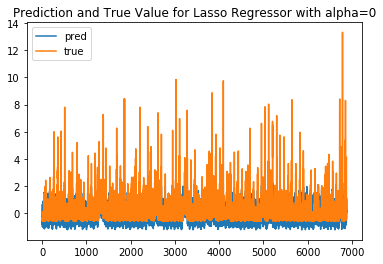

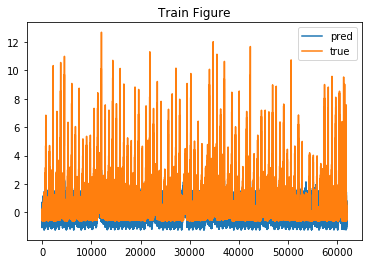

The average RMSE for training is 0.6834106588066857
The average RMSE for validation is 0.6833384257238562
When regularization strength is 0.0001


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 719.3475735845386, tolerance: 6.16682751251142
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 767.6817503255479, tolerance: 6.187348665327075
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 711.5908291163214, tolerance: 6.273161418597119
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:

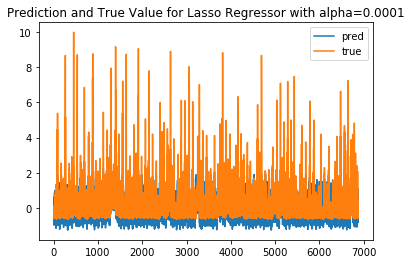

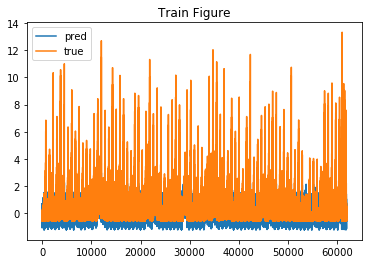

The average RMSE for training is 0.6834213834025094
The average RMSE for validation is 0.6831881935382524
When regularization strength is 0.001


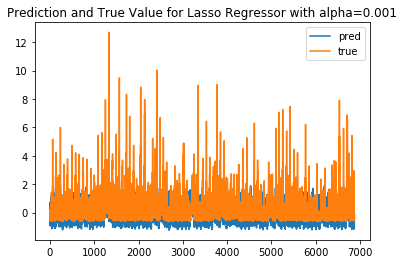

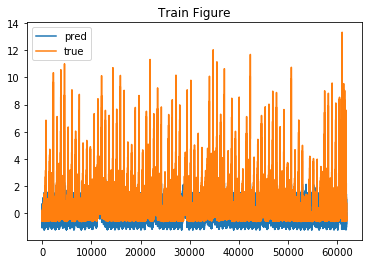

The average RMSE for training is 0.6835200570416744
The average RMSE for validation is 0.6832562805784688
When regularization strength is 0.01


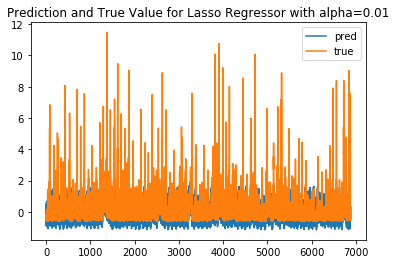

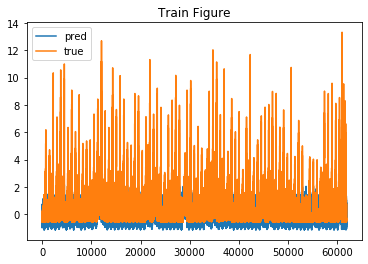

The average RMSE for training is 0.6849869340245787
The average RMSE for validation is 0.6846768851470542
When regularization strength is 0.1


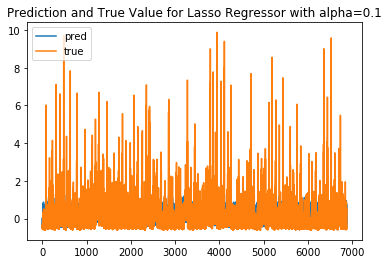

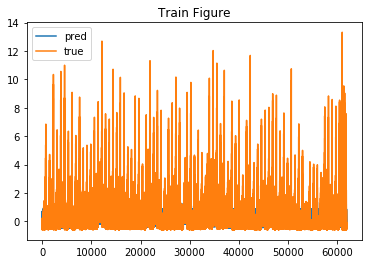

The average RMSE for training is 0.773856428828391
The average RMSE for validation is 0.773456950340038
When regularization strength is 1


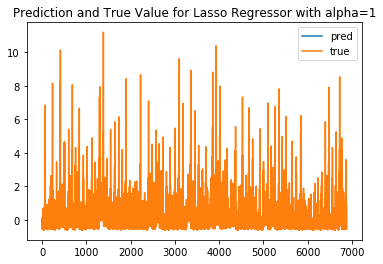

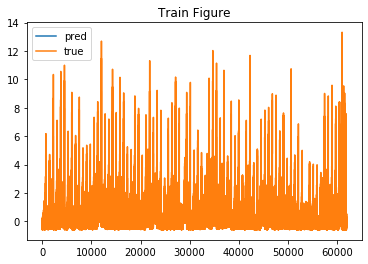

The average RMSE for training is 0.9999963919968078
The average RMSE for validation is 0.9997397793222695
When regularization strength is 10


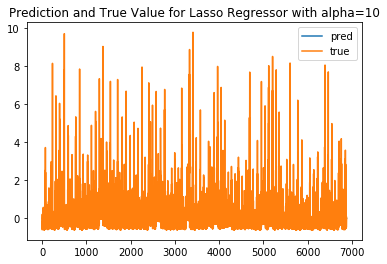

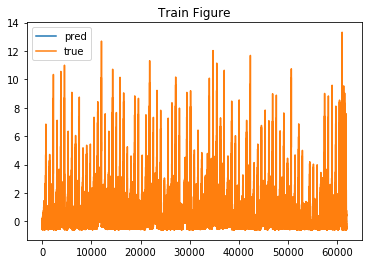

The average RMSE for training is 0.9999965846214007
The average RMSE for validation is 0.9997603292403466
When regularization strength is 100


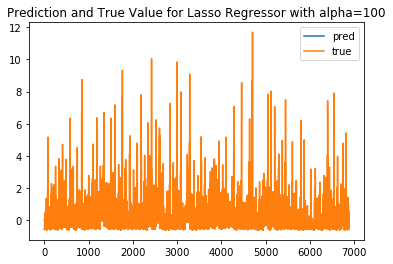

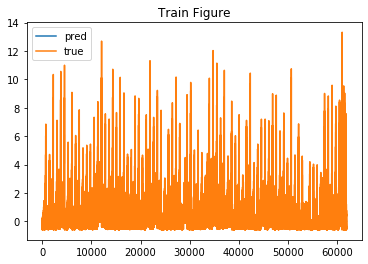

The average RMSE for training is 0.9999934787370861
The average RMSE for validation is 0.9996197864733082


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


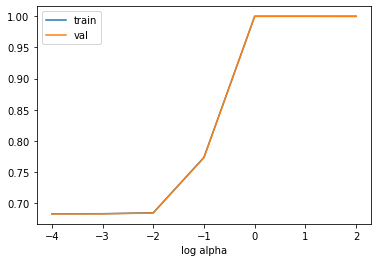

In [106]:
alpha=[0,1e-4,1e-3,1e-2,1e-1,1,10,100]
RMSE_train_overall=[]
RMSE_val_overall=[]
for i in alpha:
    print('When regularization strength is {}'.format(i))
    [RMSE_train,RMSE_val]=evaluation_lasso(video_feature_red_withlabel_onehot,i)
    RMSE_train_overall.append(RMSE_train)
    RMSE_val_overall.append(RMSE_val)
plt.plot(np.log10(alpha),RMSE_train_overall)
plt.plot(np.log10(alpha),RMSE_val_overall)
plt.legend(['train','val'])
plt.xlabel('log alpha')
plt.show()

When regularization strength is 0


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20385.68539674692, tolerance: 6.144367232827379
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression

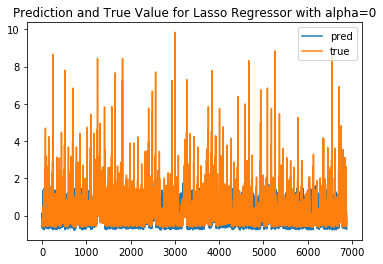

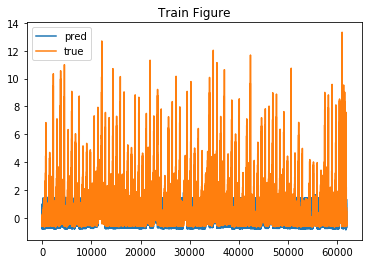

The average RMSE for training is 0.8148924901879123
The average RMSE for validation is 0.8145965910926678
When regularization strength is 0.0001


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20674.9735270366, tolerance: 6.238433442311992
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20447.43823171613, tolerance: 6.153376777389151
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20680.289233642277, tolerance: 6.210285857216643
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py

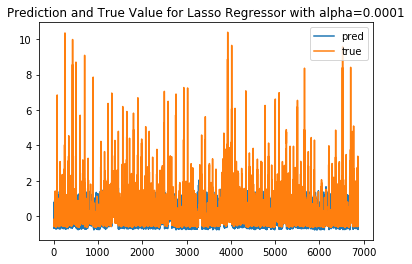

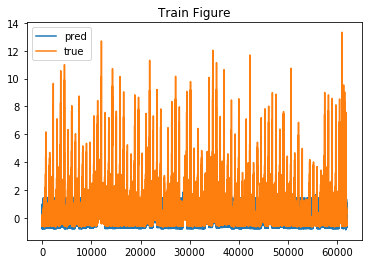

The average RMSE for training is 0.8148933951527617
The average RMSE for validation is 0.8146751211143117
When regularization strength is 0.001


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20413.15132985018, tolerance: 6.144496657216782
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20743.11505279706, tolerance: 6.256298201177125
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20648.261185158113, tolerance: 6.241993859805828
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

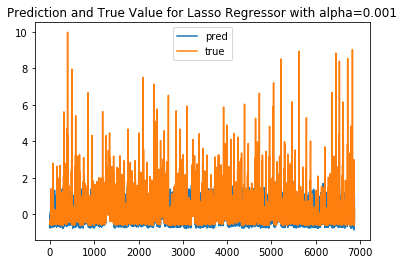

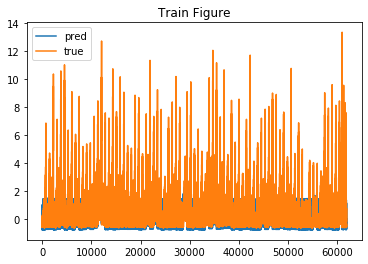

The average RMSE for training is 0.814886976856409
The average RMSE for validation is 0.8145417556055564
When regularization strength is 0.01


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20551.35127242239, tolerance: 6.198903209685714
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20331.734418951684, tolerance: 6.117105086718597
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20535.113133758732, tolerance: 6.187757822319475
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.

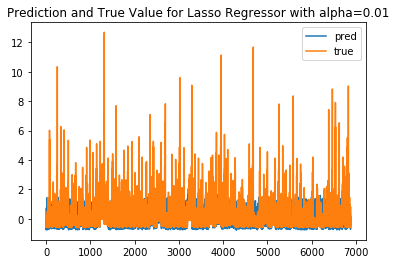

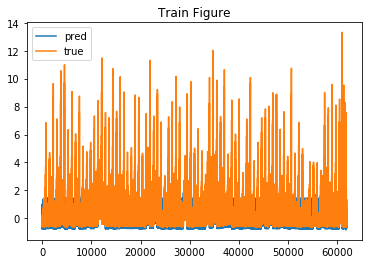

The average RMSE for training is 0.8148955602259582
The average RMSE for validation is 0.8147237098145663
When regularization strength is 0.1


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20577.23370396972, tolerance: 6.170607287408833
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20440.73173143682, tolerance: 6.130342582993812
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20529.17135849896, tolerance: 6.141812643885699
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py

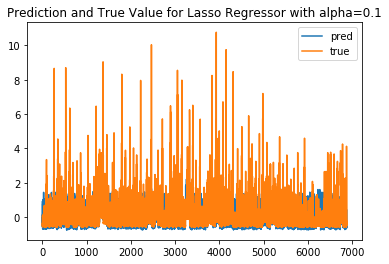

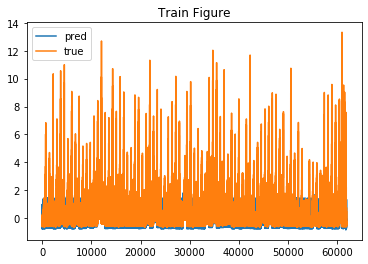

The average RMSE for training is 0.8150277536490282
The average RMSE for validation is 0.8147316822154982
When regularization strength is 1


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20620.526576413395, tolerance: 6.125346697309543
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20730.743951223623, tolerance: 6.1694699714698915
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20921.879440517063, tolerance: 6.193494595004723
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descen

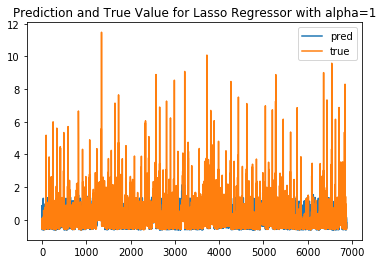

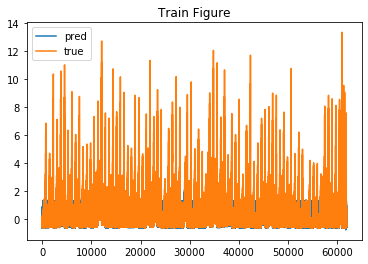

The average RMSE for training is 0.8214805599282572
The average RMSE for validation is 0.821001131396651
When regularization strength is 10


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20572.788032562763, tolerance: 6.17616963258574
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20709.473973647324, tolerance: 6.188989716856018
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20555.246394259935, tolerance: 6.166374353433702
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.

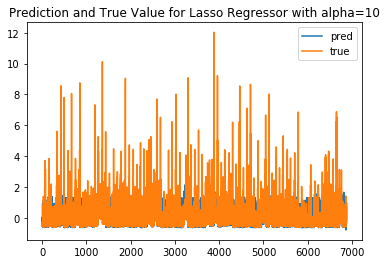

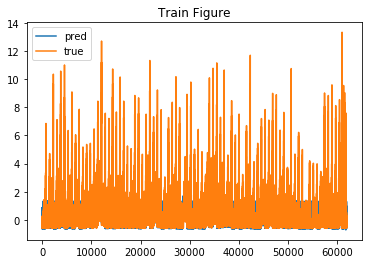

The average RMSE for training is 0.8214835190166804
The average RMSE for validation is 0.8211698509694058
When regularization strength is 100


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18532.02394445179, tolerance: 6.19309078840506
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18876.818284583496, tolerance: 6.18714893151009
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19030.67877053413, tolerance: 6.209665114590593
  positive)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:

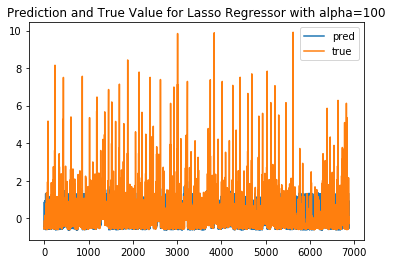

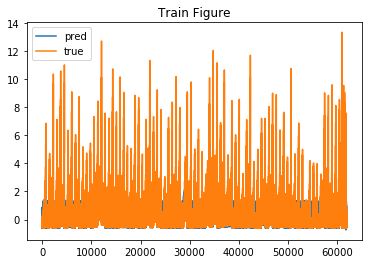

The average RMSE for training is 0.8214899174501701
The average RMSE for validation is 0.8213952662580233


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


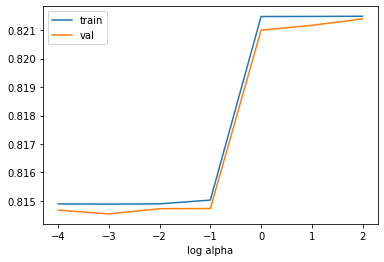

In [32]:
alpha=[0,1e-4,1e-3,1e-2,1e-1,1,10,100]
RMSE_train_overall=[]
RMSE_val_overall=[]
for i in alpha:
    print('When regularization strength is {}'.format(i))
    [RMSE_train,RMSE_val]=evaluation_lasso(video_feature_red_withlabel_noscale,i)
    RMSE_train_overall.append(RMSE_train)
    RMSE_val_overall.append(RMSE_val)
plt.plot(np.log10(alpha),RMSE_train_overall)
plt.plot(np.log10(alpha),RMSE_val_overall)
plt.legend(['train','val'])
plt.xlabel('log alpha')
plt.show()

In [25]:
#Ridge
from sklearn.linear_model import Ridge

In [26]:
def evaluation_ridge(X_train,alpha):
    kf=KFold(10,shuffle=True)#defin 10 fold spliter
    RMSE_val=[]
    RMSE_train=[]
    for train_data, test_data in kf.split(X_train):
        train_data=X_train[train_data]
        test_data=X_train[test_data]
        RD=Ridge(alpha=alpha)
        train_data=np.array(train_data)
        test_data=np.array(test_data)
        train_data_feature=train_data[:,:train_data.shape[1]-1]#split feature and label
        train_data_label=train_data[:,train_data.shape[1]-1]
        test_data_feature=test_data[:,:test_data.shape[1]-1]
        test_data_label=test_data[:,test_data.shape[1]-1]
        mdl=RD.fit(train_data_feature,train_data_label)
        pred_train=RD.predict(train_data_feature)
        RMSE_train_sub=np.sqrt(mean_squared_error(train_data_label,pred_train))
        RMSE_train.append(RMSE_train_sub)
        RMSE_train_ave=np.mean(RMSE_train)
        pred_val=RD.predict(test_data_feature)#prediction
        RMSE_val_sub=np.sqrt(mean_squared_error(test_data_label,pred_val))
        RMSE_val.append(RMSE_val_sub)
        RMSE_val_ave=np.mean(RMSE_val)
    plt.plot(pred_val)
    plt.plot(test_data_label)
    plt.legend(['pred','true'])
    plt.title('Prediction and True Value for Ridge Regressor with alpha={}'.format(alpha))  
    plt.show()
    plt.plot(pred_train)
    plt.plot(train_data_label)
    plt.legend(['pred','true'])
    plt.title('Train Figure')
    plt.show()
    print('The average RMSE for training is {}'.format(RMSE_train_ave))
    print('The average RMSE for validation is {}'.format(RMSE_val_ave))
    return RMSE_train_ave,RMSE_val_ave

When regularization strength is 0


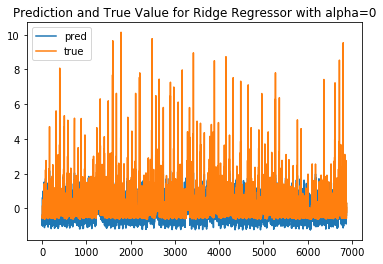

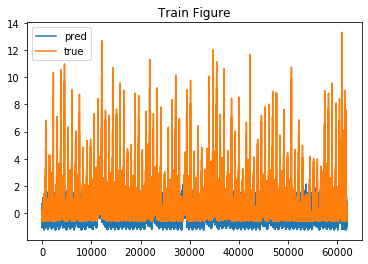

The average RMSE for training is 0.6834074750083972
The average RMSE for validation is 0.6832122890779649
When regularization strength is 0.0001


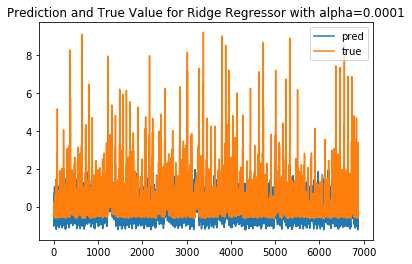

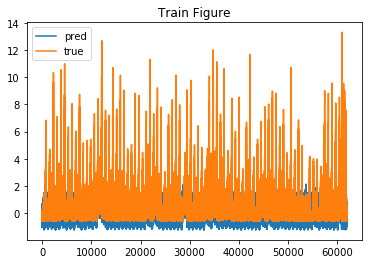

The average RMSE for training is 0.6833997540863185
The average RMSE for validation is 0.6830568338990581
When regularization strength is 0.001


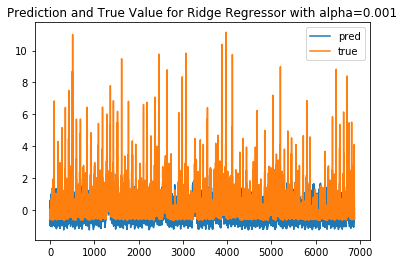

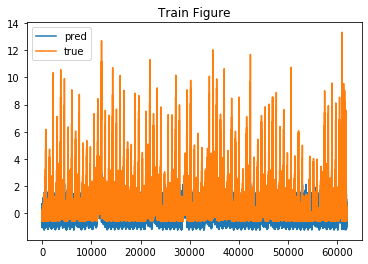

The average RMSE for training is 0.6834074292594129
The average RMSE for validation is 0.6831671376034739
When regularization strength is 0.01


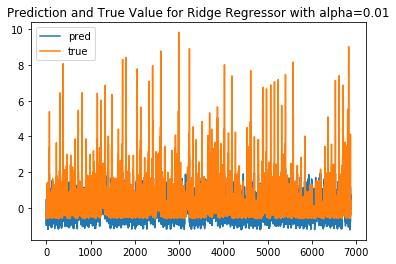

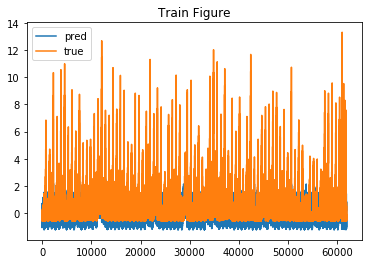

The average RMSE for training is 0.6834071392734883
The average RMSE for validation is 0.6830672156404961
When regularization strength is 0.1


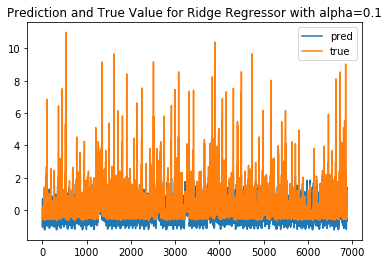

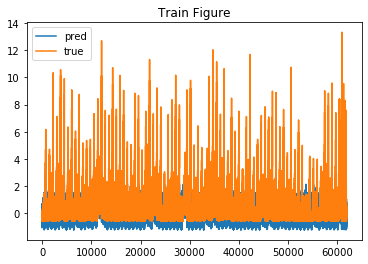

The average RMSE for training is 0.6833979898820652
The average RMSE for validation is 0.6829578263492235
When regularization strength is 1


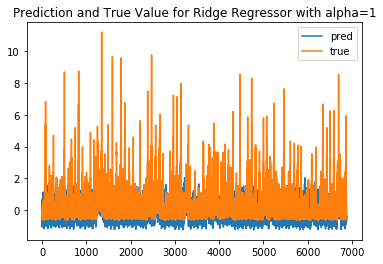

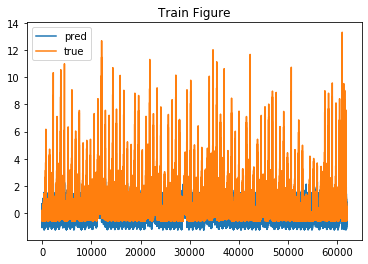

The average RMSE for training is 0.6834116148240923
The average RMSE for validation is 0.6833586371261913
When regularization strength is 10


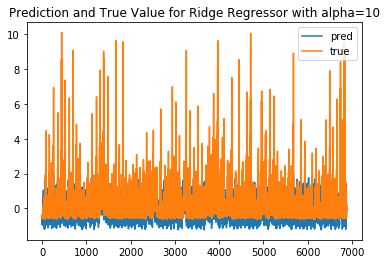

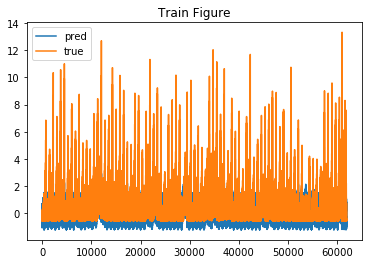

The average RMSE for training is 0.6834084345727713
The average RMSE for validation is 0.6831770447219306
When regularization strength is 100


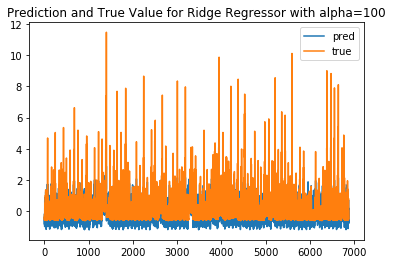

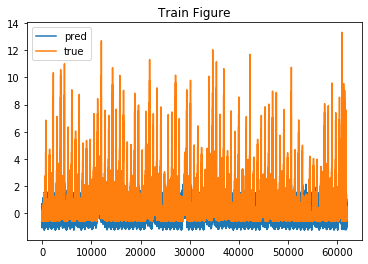

The average RMSE for training is 0.6834444952624893
The average RMSE for validation is 0.6832183303229534


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'RMSE')

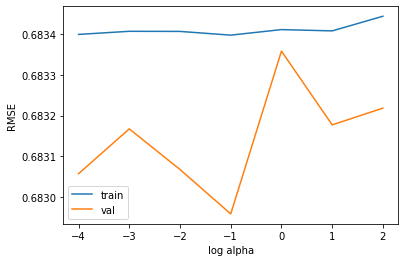

In [32]:
alpha=[0,1e-4,1e-3,1e-2,1e-1,1,10,100]
RMSE_train_overall=[]
RMSE_val_overall=[]
for i in alpha:
    print('When regularization strength is {}'.format(i))
    [RMSE_train,RMSE_val]=evaluation_ridge(video_feature_red_withlabel_onehot,i)
    RMSE_train_overall.append(RMSE_train)
    RMSE_val_overall.append(RMSE_val)
plt.plot(np.log10(alpha),RMSE_train_overall)
plt.plot(np.log10(alpha),RMSE_val_overall)
plt.legend(['train','val'])
plt.xlabel('log alpha')
plt.ylabel('RMSE')

When regularization strength is 0


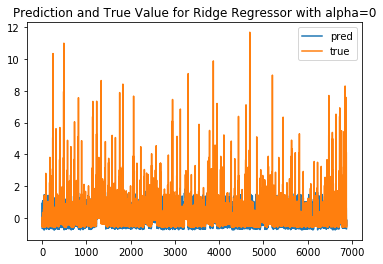

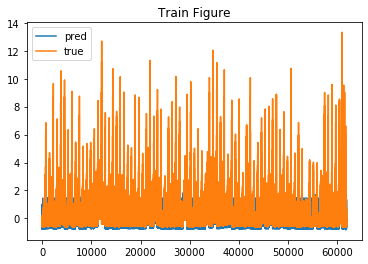

The average RMSE for training is 0.8148974524286888
The average RMSE for validation is 0.8149176711143902
When regularization strength is 0.0001


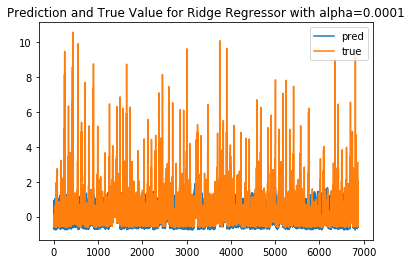

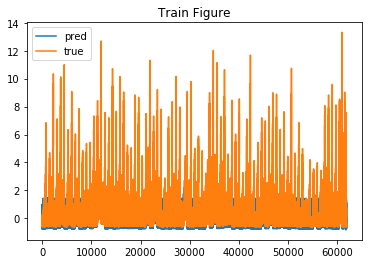

The average RMSE for training is 0.8148926429282733
The average RMSE for validation is 0.8148433602661747
When regularization strength is 0.001


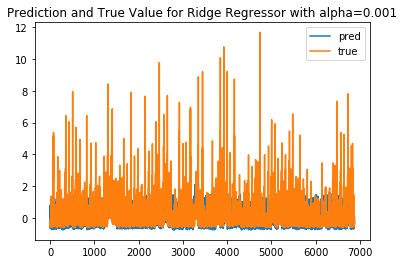

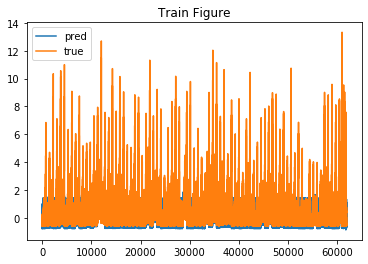

The average RMSE for training is 0.8148950014452987
The average RMSE for validation is 0.8147961228975197
When regularization strength is 0.01


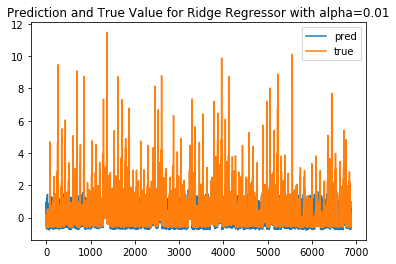

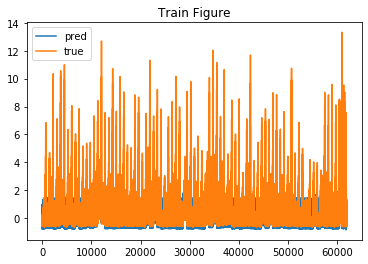

The average RMSE for training is 0.8148970791247123
The average RMSE for validation is 0.814797514465074
When regularization strength is 0.1


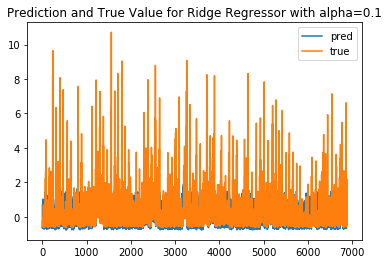

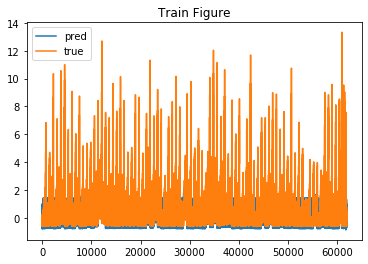

The average RMSE for training is 0.8148948987446266
The average RMSE for validation is 0.814822310880194
When regularization strength is 1


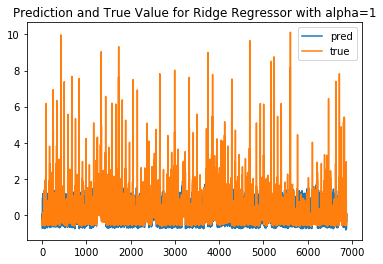

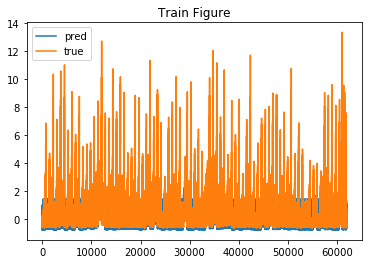

The average RMSE for training is 0.8148931314969697
The average RMSE for validation is 0.8147906432449167
When regularization strength is 10


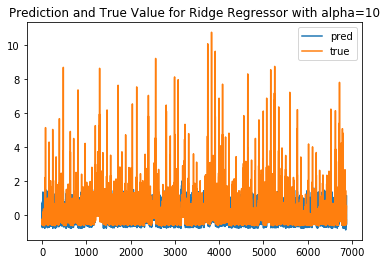

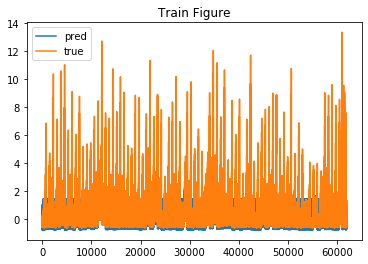

The average RMSE for training is 0.8148957670818735
The average RMSE for validation is 0.8147135767028775
When regularization strength is 100


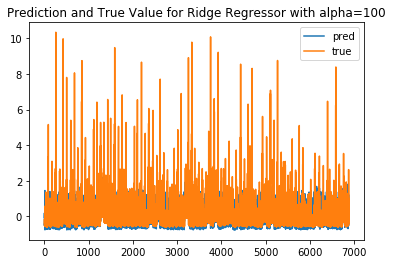

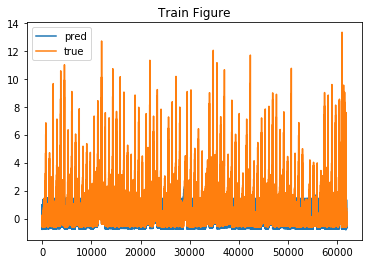

The average RMSE for training is 0.814894871298067
The average RMSE for validation is 0.8148475294810197


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'RMSE')

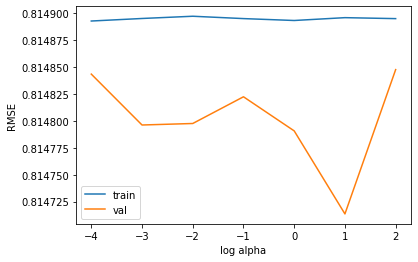

In [34]:
alpha=[0,1e-4,1e-3,1e-2,1e-1,1,10,100]
RMSE_train_overall=[]
RMSE_val_overall=[]
for i in alpha:
    print('When regularization strength is {}'.format(i))
    [RMSE_train,RMSE_val]=evaluation_ridge(video_feature_red_withlabel_noscale,i)
    RMSE_train_overall.append(RMSE_train)
    RMSE_val_overall.append(RMSE_val)
plt.plot(np.log10(alpha),RMSE_train_overall)
plt.plot(np.log10(alpha),RMSE_val_overall)
plt.legend(['train','val'])
plt.xlabel('log alpha')
plt.ylabel('RMSE')

# Polynomial

In [35]:
#polynoimal regression
from sklearn.preprocessing import PolynomialFeatures

In [36]:
def evaluation_poly(i,label):
    poly=PolynomialFeatures(degree=i)
    video_feature_poly=poly.fit_transform(video_feature_red_onehot)
    label=label.reshape(len(video_label),1)
    video_feature_poly_withlabel=np.concatenate((video_feature_poly,label),axis=1)
    [RMSE_train,RMSE_val]=evaluation_ridge(video_feature_poly_withlabel,0.1)
    return RMSE_train,RMSE_val

When the polynomial degree is 1


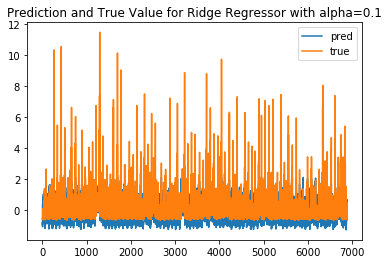

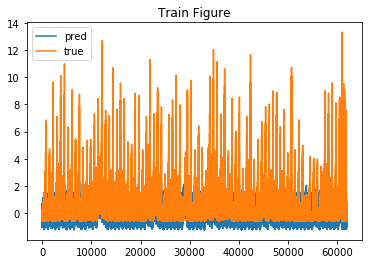

The average RMSE for training is 0.6834065329595883
The average RMSE for validation is 0.6833167511199221
When the polynomial degree is 2


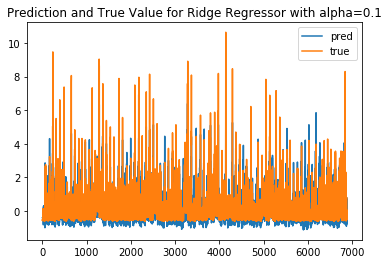

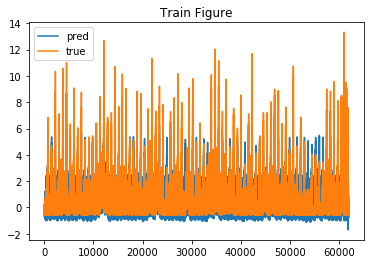

The average RMSE for training is 0.4058458679633521
The average RMSE for validation is 0.4084378203317689
When the polynomial degree is 3


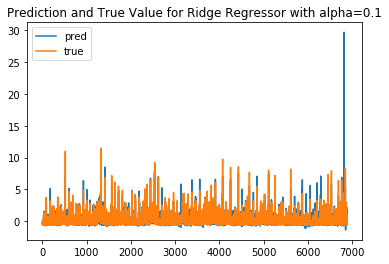

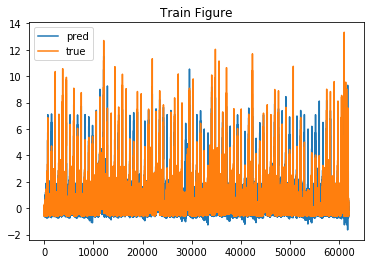

The average RMSE for training is 0.2775184318112547
The average RMSE for validation is 0.32527293978546407
When the polynomial degree is 4


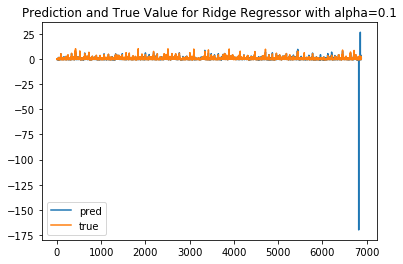

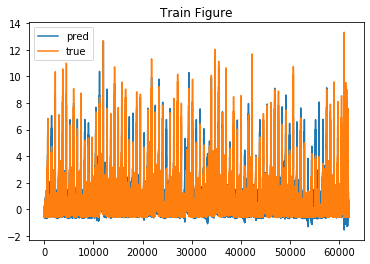

The average RMSE for training is 0.2250109741491754
The average RMSE for validation is 1.8413849911929983
When the polynomial degree is 5


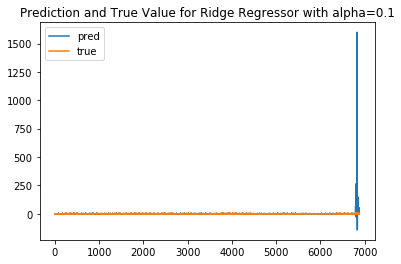

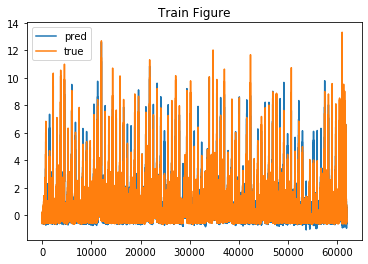

The average RMSE for training is 0.18404549803357806
The average RMSE for validation is 14.797509375141122


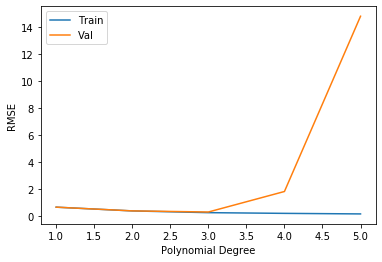

In [37]:
degree=[1,2,3,4,5]
RMSE_train=[]
RMSE_val=[]
for i in degree:
    print('When the polynomial degree is {}'.format(i))
    RMSE_train_sub,RMSE_val_sub=evaluation_poly(i,video_label)
    RMSE_train.append(RMSE_train_sub)
    RMSE_val.append(RMSE_val_sub)
plt.plot(degree,RMSE_train)
plt.plot(degree,RMSE_val)
plt.legend(['Train','Val'])
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.show()

# Neural Network

In [18]:
#neural network
from sklearn.neural_network import MLPRegressor

In [19]:
def evaluation_neural(X_train,size,activation,alpha):
    kf=KFold(10,shuffle=True)#defin 10 fold spliter
    RMSE_val=[]
    RMSE_train=[]
    for train_data, test_data in kf.split(X_train):
        train_data=X_train[train_data]
        test_data=X_train[test_data]
        model=MLPRegressor(hidden_layer_sizes=size,activation=activation,solver='sgd',alpha=alpha)
        train_data=np.array(train_data)
        test_data=np.array(test_data)
        train_data_feature=train_data[:,:train_data.shape[1]-1]#split feature and label
        train_data_label=train_data[:,train_data.shape[1]-1]
        test_data_feature=test_data[:,:test_data.shape[1]-1]
        test_data_label=test_data[:,test_data.shape[1]-1]
        mdl=model.fit(train_data_feature,train_data_label)
        pred_train=model.predict(train_data_feature)
        RMSE_train_sub=np.sqrt(mean_squared_error(train_data_label,pred_train))
        RMSE_train.append(RMSE_train_sub)
        pred_val=model.predict(test_data_feature)#prediction
        RMSE_val_sub=np.sqrt(mean_squared_error(test_data_label,pred_val))
        RMSE_val.append(RMSE_val_sub)
    RMSE_train_ave=np.mean(RMSE_train)
    RMSE_val_ave=np.mean(RMSE_val)
    plt.plot(pred_val)
    plt.plot(test_data_label)
    plt.legend(['pred','true'])
    plt.title('Prediction and True Value for Neural Network with depth={} and activation as {}'.format(size,activation))  
    plt.show()
    plt.plot(pred_train)
    plt.plot(train_data_label)
    plt.legend(['pred','true'])
    plt.title('Train Figure')
    plt.show()
    print('The average RMSE for training is {}'.format(RMSE_train_ave))
    print('The average RMSE for validation is {}'.format(RMSE_val_ave))
    return RMSE_train_ave,RMSE_val_ave

When the network activation function is identity


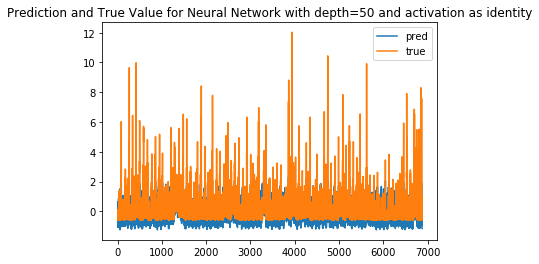

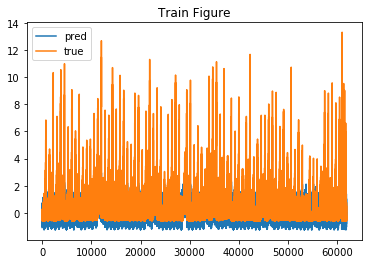

The average RMSE for training is 0.683959989823866
The average RMSE for validation is 0.6836477371084874
When the network activation function is logistic


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

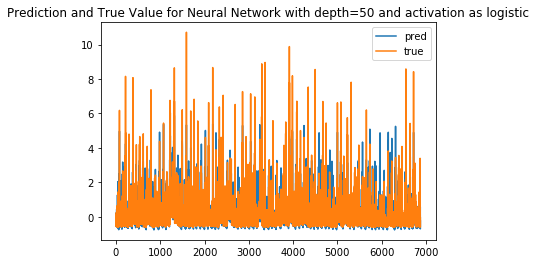

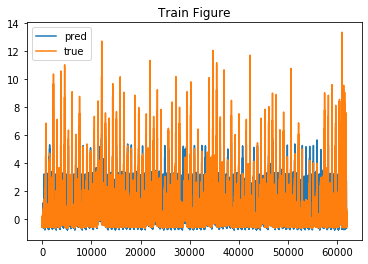

The average RMSE for training is 0.41739712633381093
The average RMSE for validation is 0.4174090643980823
When the network activation function is tanh


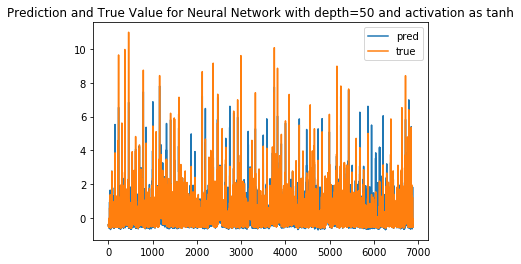

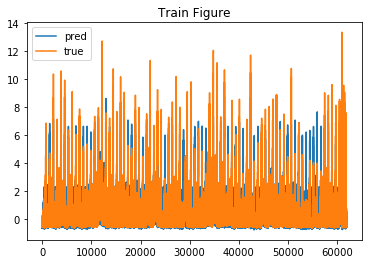

The average RMSE for training is 0.29314236540596206
The average RMSE for validation is 0.2947043980193078
When the network activation function is relu


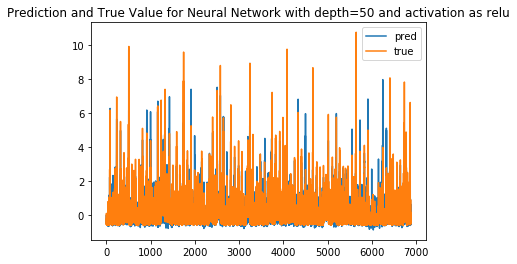

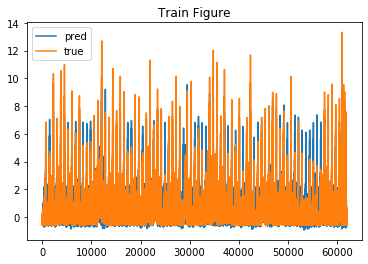

The average RMSE for training is 0.28360127382521266
The average RMSE for validation is 0.2853410952628336


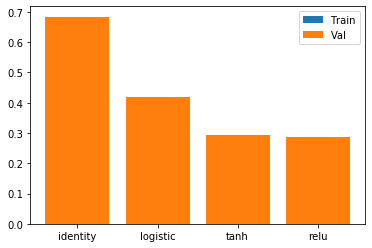

In [115]:
#Activation Function
activation=['identity','logistic','tanh','relu']
RMSE_train=[]
RMSE_val=[]
for act in activation:
    print('When the network activation function is {}'.format(act))
    RMSE_train_sub,RMSE_val_sub=evaluation_neural(video_feature_red_withlabel_onehot,50,act,alpha=0.0001)
    RMSE_train.append(RMSE_train_sub)
    RMSE_val.append(RMSE_val_sub)
plt.bar(activation,RMSE_train)
plt.bar(activation,RMSE_val)
plt.legend(['Train','Val'])


When the network size is 50


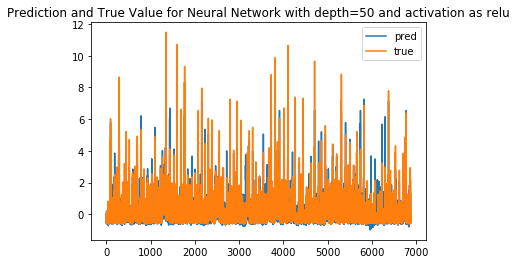

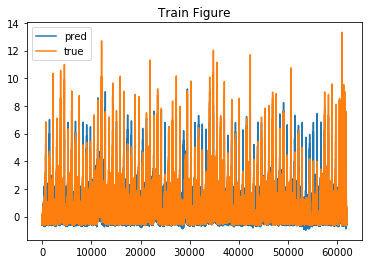

The average RMSE for training is 0.28561722902520414
The average RMSE for validation is 0.2884925103261426
When the network size is 75


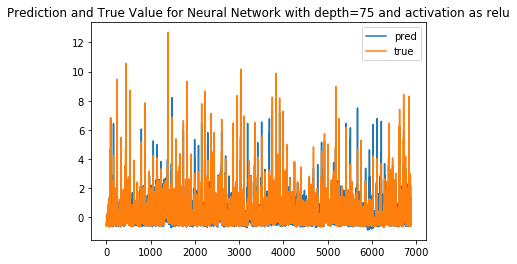

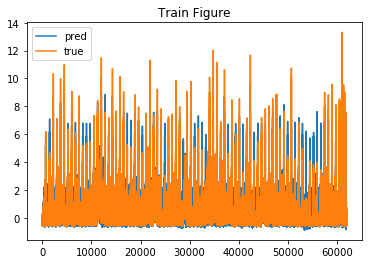

The average RMSE for training is 0.27791348069694904
The average RMSE for validation is 0.28030823671814875
When the network size is 100


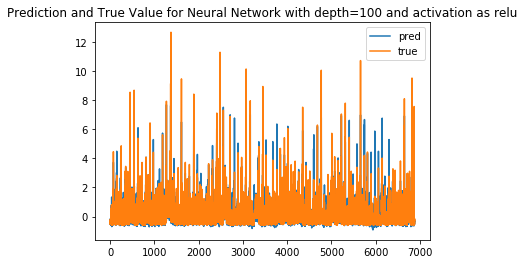

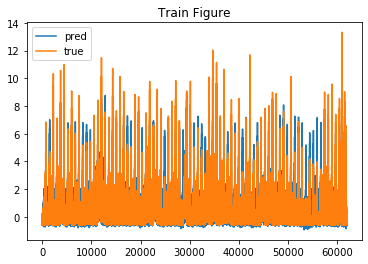

The average RMSE for training is 0.2728163572855689
The average RMSE for validation is 0.27536282003552237
When the network size is 200


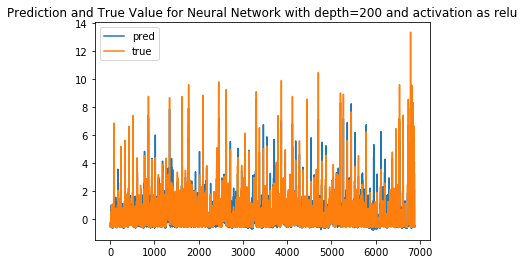

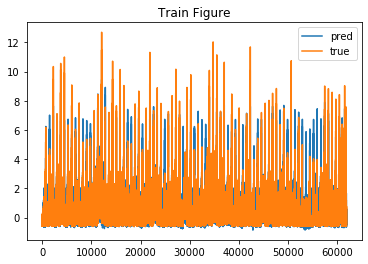

The average RMSE for training is 0.26771254443258474
The average RMSE for validation is 0.2704677393120929
When the network size is 300


In [ ]:
#Hidden Layer Size
size=[50,75,100,200,300,400,500]
RMSE_train=[]
RMSE_val=[]
for s in size:
    print('When the network size is {}'.format(s))
    RMSE_train_sub,RMSE_val_sub=evaluation_neural(video_feature_red_withlabel_onehot,s,'relu',alpha=0.0001)
    RMSE_train.append(RMSE_train_sub)
    RMSE_val.append(RMSE_val_sub)
plt.plot(size,RMSE_train)
plt.plot(size,RMSE_val)
plt.legend(['Train','Val'])


When the network hidden layer size is [200, 100, 50]


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


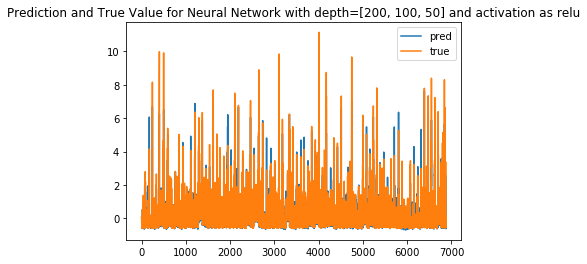

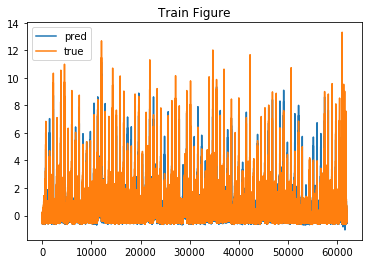

The average RMSE for training is 0.20865123176350217
The average RMSE for validation is 0.2177909195912829
When the network hidden layer size is [200, 100, 50, 30]


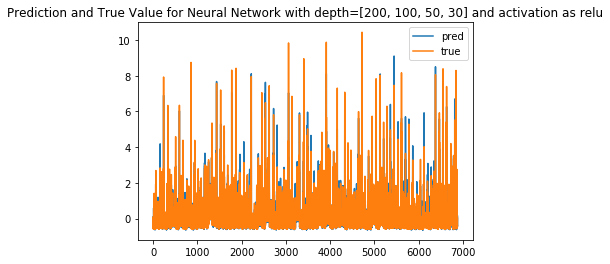

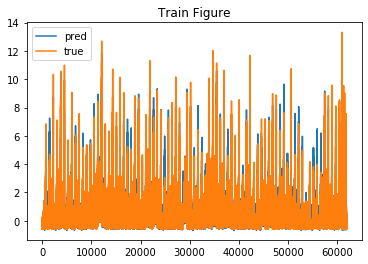

The average RMSE for training is 0.2014467795757366
The average RMSE for validation is 0.2125405032668099
When the network hidden layer size is [200, 100, 50, 30, 15]


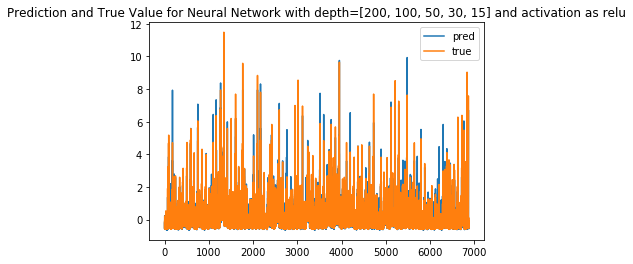

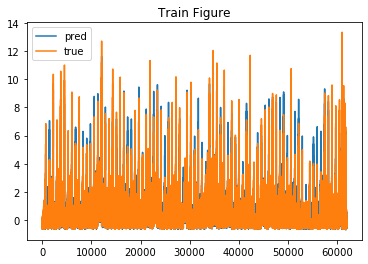

The average RMSE for training is 0.20427576590127844
The average RMSE for validation is 0.21694281907269325


Text(0, 0.5, 'RMSE')

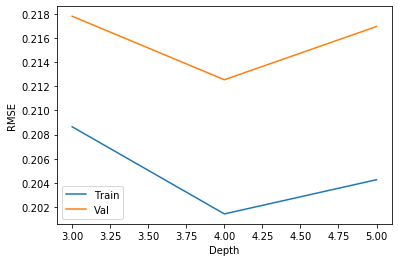

In [20]:
#Network Depth
size=[]
size.append([200,100,50])
size.append([200,100,50,30])
size.append([200,100,50,30,15])
RMSE_train=[]
RMSE_val=[]
for size_sub in size:
    print('When the network hidden layer size is {}'.format(size_sub))
    RMSE_train_sub,RMSE_val_sub=evaluation_neural(video_feature_red_withlabel_onehot,size_sub,activation='relu',alpha=0.0001)
    RMSE_train.append(RMSE_train_sub)
    RMSE_val.append(RMSE_val_sub)

depth=[3,4,5]
plt.plot(depth,RMSE_train)
plt.plot(depth,RMSE_val)
plt.legend(['Train','Val'])
plt.xlabel('Depth')
plt.ylabel('RMSE')


When the regularization strength is [0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100.0]


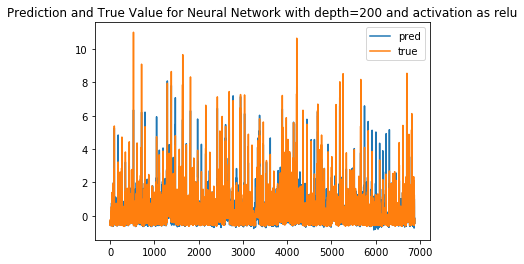

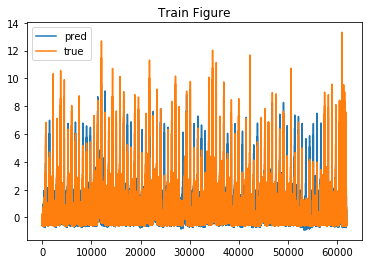

The average RMSE for training is 0.26787514379147054
The average RMSE for validation is 0.2708533723225456
When the regularization strength is [0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100.0]


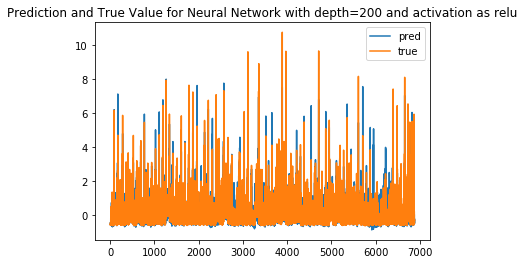

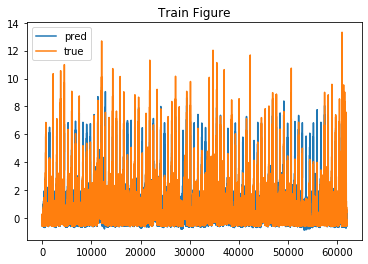

The average RMSE for training is 0.26823810143880467
The average RMSE for validation is 0.27043449811352527
When the regularization strength is [0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100.0]


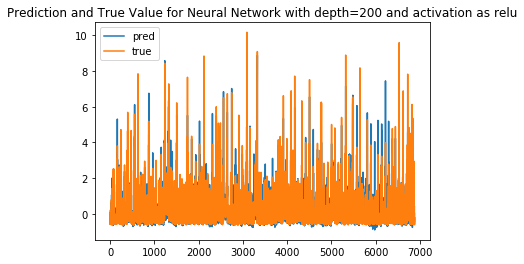

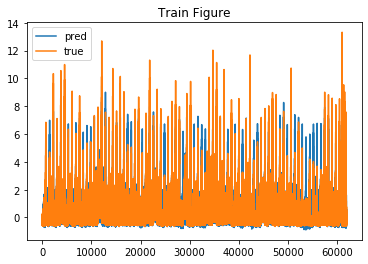

The average RMSE for training is 0.26942643421255835
The average RMSE for validation is 0.2714726193617862
When the regularization strength is [0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100.0]


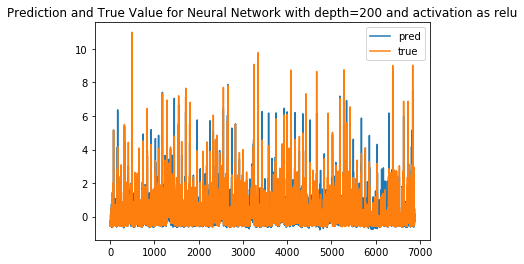

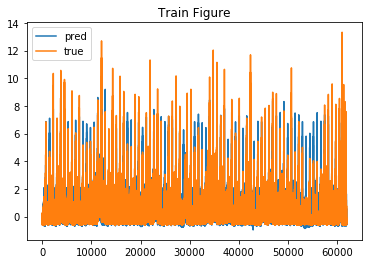

The average RMSE for training is 0.2682129039218342
The average RMSE for validation is 0.27103966412022296
When the regularization strength is [0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100.0]


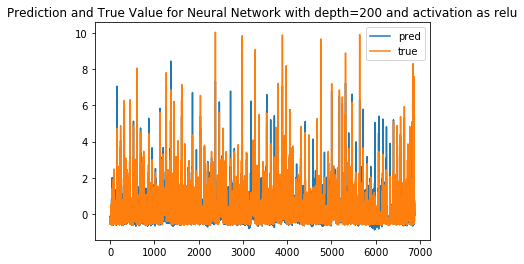

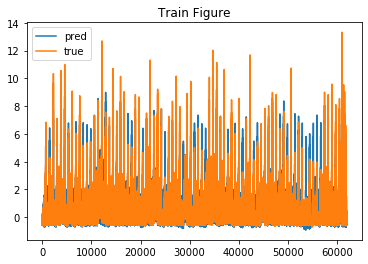

The average RMSE for training is 0.27176028701012733
The average RMSE for validation is 0.2741963105848212
When the regularization strength is [0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100.0]


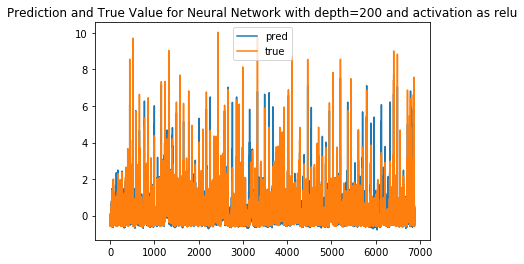

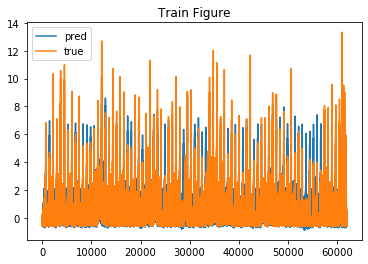

The average RMSE for training is 0.28264284627256464
The average RMSE for validation is 0.28515847107591413
When the regularization strength is [0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100.0]


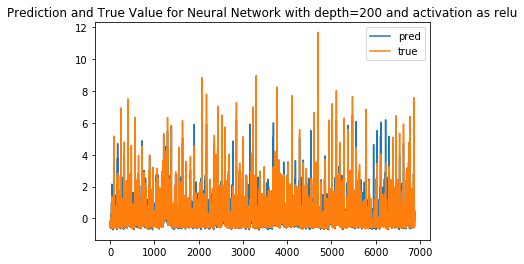

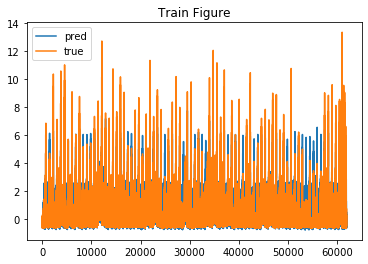

The average RMSE for training is 0.33411907754896936
The average RMSE for validation is 0.33507965749793917
When the regularization strength is [0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100.0]


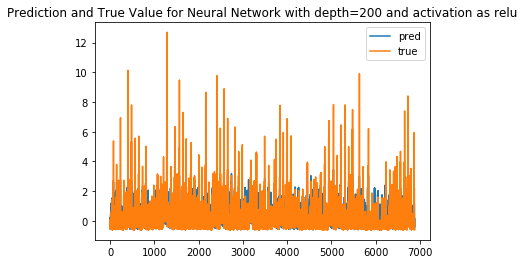

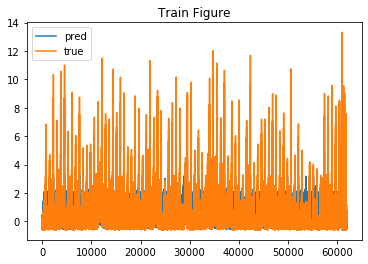

The average RMSE for training is 0.5428305390805773
The average RMSE for validation is 0.5426346273801206
When the regularization strength is [0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100.0]


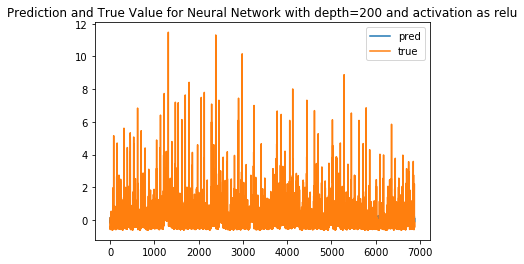

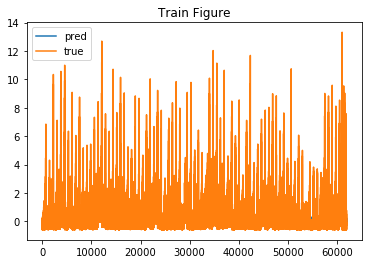

The average RMSE for training is 0.9169875514283532
The average RMSE for validation is 0.916819487081105


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


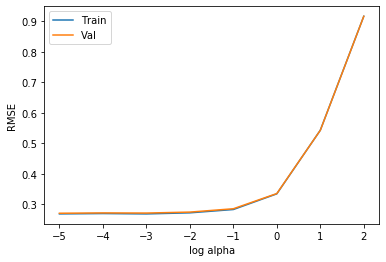

In [23]:
#Regularization Strength
alpha=[0,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,1e2]
RMSE_train=[]
RMSE_val=[]
for a in alpha:
    print('When the regularization strength is {}'.format(a))
    RMSE_train_sub,RMSE_val_sub=evaluation_neural(video_feature_red_withlabel_onehot,200,'relu',alpha=a)
    RMSE_train.append(RMSE_train_sub)
    RMSE_val.append(RMSE_val_sub)

plt.plot(np.log10(alpha),RMSE_train)
plt.plot(np.log10(alpha),RMSE_val)
plt.legend(['Train','Val'])
plt.xlabel('log alpha')
plt.ylabel('RMSE')
plt.show()

c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


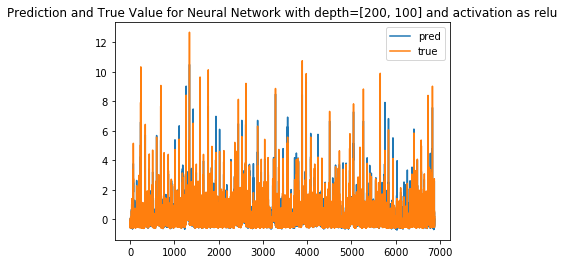

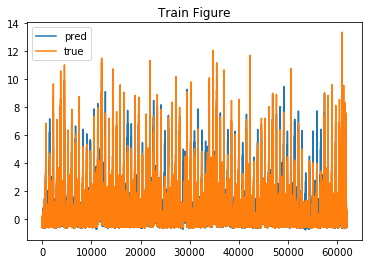

The average RMSE for training is 0.22360708457419057
The average RMSE for validation is 0.23009459747036737


In [24]:
#Best model configuration evaluation
RMSE_train_sub,RMSE_val_sub=evaluation_neural(video_feature_red_withlabel_onehot,[200,100],'relu',alpha=1e-3)

# Random Forest

In [18]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [19]:
def evaluation_randomforest(X_train,n,max_features,max_depth):
    kf=KFold(10,shuffle=True)#defin 10 fold spliter
    RMSE_val=[]
    RMSE_train=[]
    OOB=[]
    for train_data, test_data in kf.split(X_train):
        train_data=X_train[train_data]
        test_data=X_train[test_data]
        model=RandomForestRegressor(n_estimators=n,max_features=max_features,max_depth=max_depth,oob_score=True)
        train_data=np.array(train_data)
        test_data=np.array(test_data)
        train_data_feature=train_data[:,:train_data.shape[1]-1]#split feature and label
        train_data_label=train_data[:,train_data.shape[1]-1]
        test_data_feature=test_data[:,:test_data.shape[1]-1]
        test_data_label=test_data[:,test_data.shape[1]-1]
        mdl=model.fit(train_data_feature,train_data_label)
        pred_train=model.predict(train_data_feature)
        RMSE_train_sub=np.sqrt(mean_squared_error(train_data_label,pred_train))
        RMSE_train.append(RMSE_train_sub)
        RMSE_train_ave=np.mean(RMSE_train)
        pred_val=model.predict(test_data_feature)#prediction
        RMSE_val_sub=np.sqrt(mean_squared_error(test_data_label,pred_val))
        RMSE_val.append(RMSE_val_sub)
        RMSE_val_ave=np.mean(RMSE_val)
        OOB.append(1-mdl.oob_score_)
    OOB_ave=np.mean(OOB)
    plt.plot(pred_val)
    plt.plot(test_data_label)
    plt.legend(['pred','true'])
    plt.title('Prediction and True Value for Random Forest with estimator number={} and maximum features as {}, and max_depth={}'.format(n,max_features,max_depth))  
    plt.show()
    plt.plot(pred_train)
    plt.plot(train_data_label)
    plt.legend(['pred','true'])
    plt.title('Train Figure')
    plt.show()
    print('The average RMSE for training is {}'.format(RMSE_train_ave))
    print('The average RMSE for validation is {}'.format(RMSE_val_ave))
    print('The average OOB of Random Forest model is {}'.format(OOB_ave))
    return RMSE_train_ave,RMSE_val_ave,OOB_ave

When n_estimator is 2


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB score

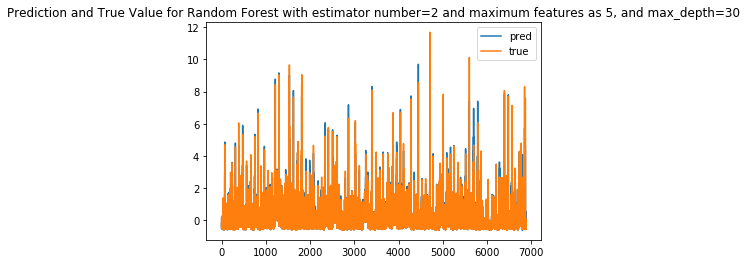

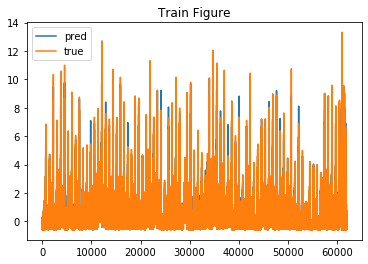

The average RMSE for training is 0.08754204657220131
The average RMSE for validation is 0.15540156078324072
The average OOB of Random Forest model is 0.4186900693608604
When n_estimator is 10


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB score

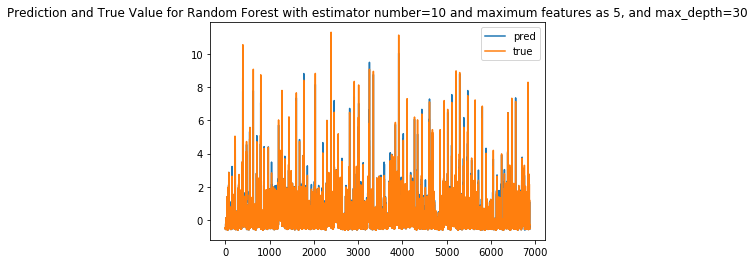

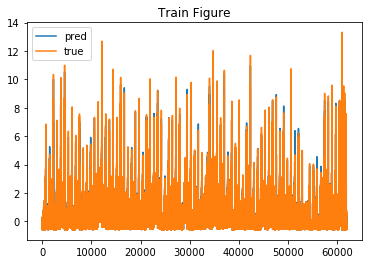

The average RMSE for training is 0.051559051667517085
The average RMSE for validation is 0.1120113696405682
The average OOB of Random Forest model is 0.030612888759035506
When n_estimator is 20


c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB score

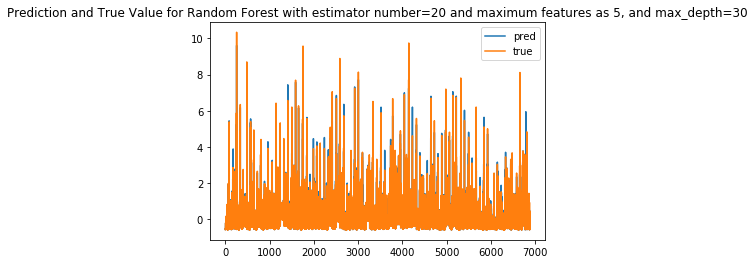

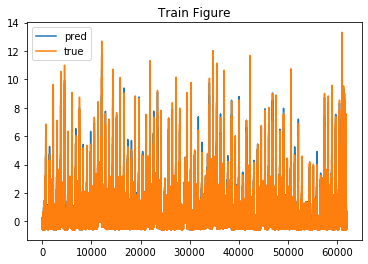

The average RMSE for training is 0.04576332687998873
The average RMSE for validation is 0.1098783680595605
The average OOB of Random Forest model is 0.01512638234800121
When n_estimator is 30


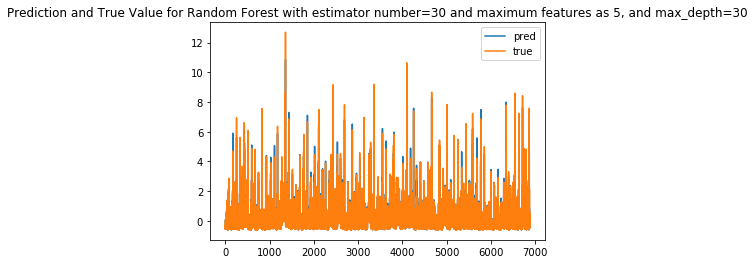

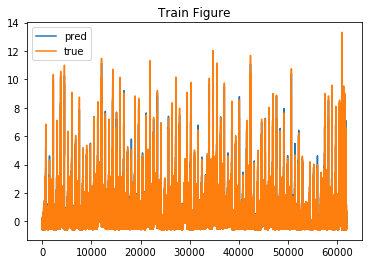

The average RMSE for training is 0.04303839026994042
The average RMSE for validation is 0.1054796970850547
The average OOB of Random Forest model is 0.013269723405563283
When n_estimator is 40


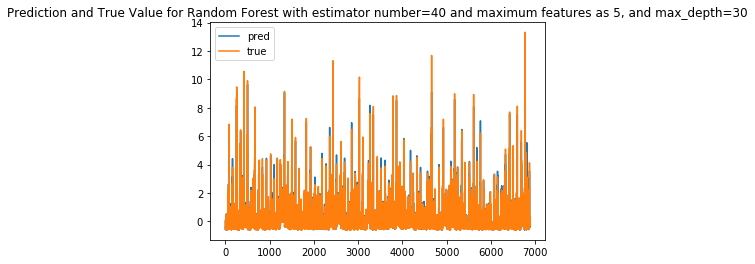

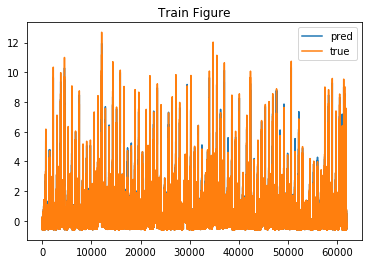

The average RMSE for training is 0.04164723976205176
The average RMSE for validation is 0.10507161568198371
The average OOB of Random Forest model is 0.012482944000119723
When n_estimator is 50


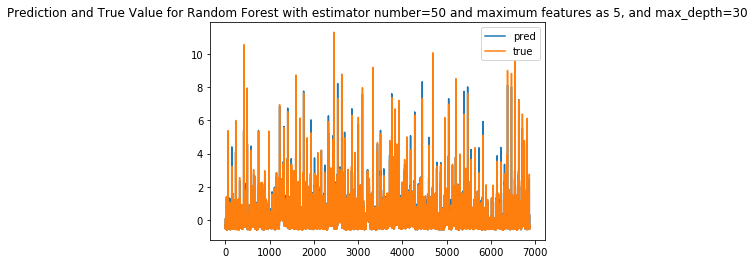

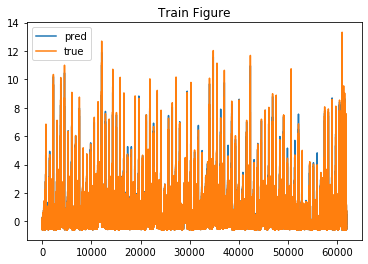

The average RMSE for training is 0.04105977796553134
The average RMSE for validation is 0.10606952687176359
The average OOB of Random Forest model is 0.012131410083089244
When n_estimator is 60


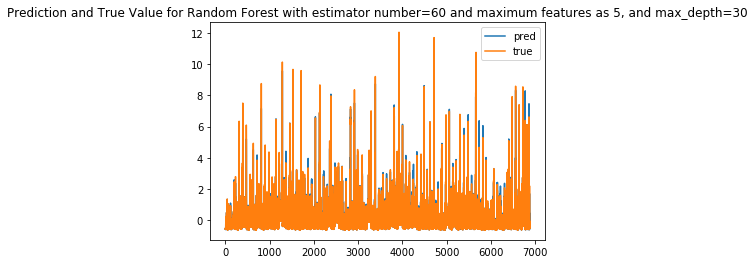

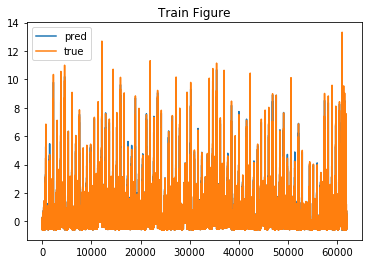

The average RMSE for training is 0.0404381836330122
The average RMSE for validation is 0.10294355557024697
The average OOB of Random Forest model is 0.011739922574480265
When n_estimator is 70


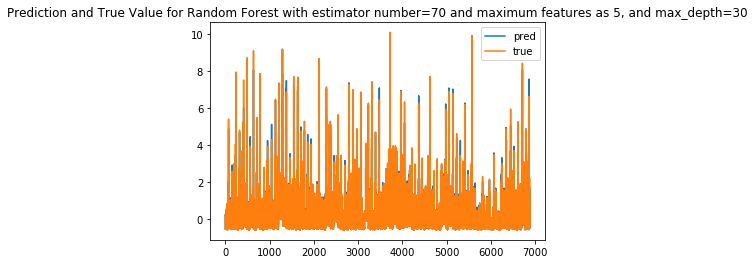

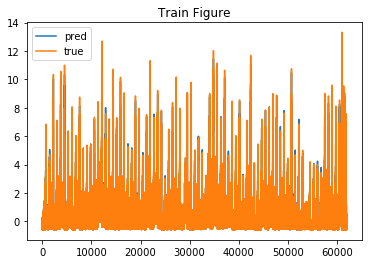

The average RMSE for training is 0.039483957099411035
The average RMSE for validation is 0.10312752168298552
The average OOB of Random Forest model is 0.011273817775619732
When n_estimator is 80


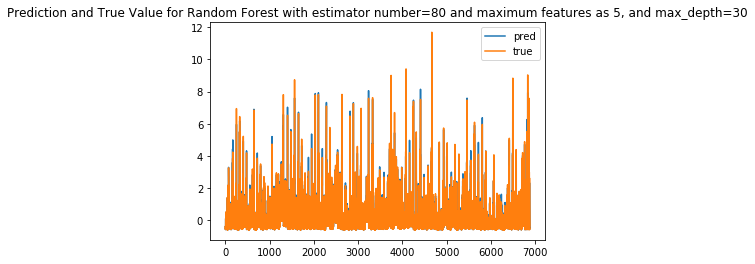

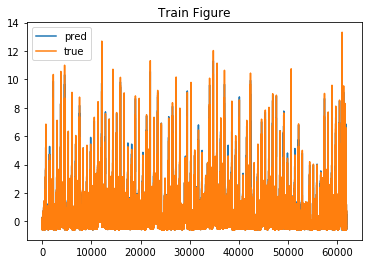

The average RMSE for training is 0.03956715482509652
The average RMSE for validation is 0.10410938314340872
The average OOB of Random Forest model is 0.011357191734540029
When n_estimator is 90


KeyboardInterrupt: 

In [20]:
#Number of Trees
n_estimators=[2,10,20,30,40,50,60,70]
RMSE_train=[]
RMSE_val=[]
OOB=[]
for n in n_estimators:
    print('When n_estimator is {}'.format(n))
    RMSE_train_sub,RMSE_val_sub,OOB_sub=evaluation_randomforest(video_feature_red_withlabel_onehot,n,5,30)
    RMSE_train.append(RMSE_train_sub)
    RMSE_val.append(RMSE_val_sub)
    OOB.append(OOB_sub)
print('Loop is done')


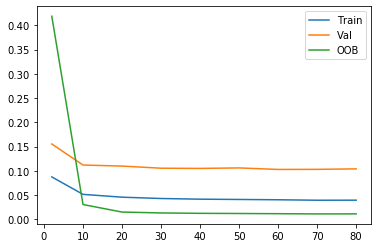

In [22]:
n_estimators=[2,10,20,30,40,50,60,70,80]
plt.plot(n_estimators,RMSE_train)
plt.plot(n_estimators,RMSE_val)
plt.plot(n_estimators,OOB)
plt.legend(['Train','Val','OOB'])

When maximum_feature is 1


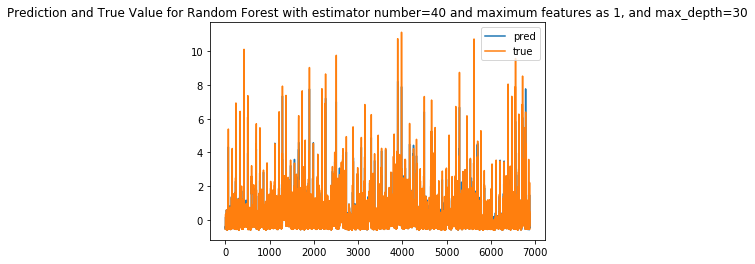

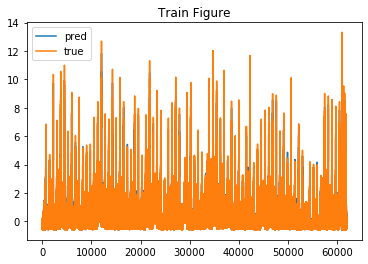

The average RMSE for training is 0.07832249295203435
The average RMSE for validation is 0.1894100954191726
The average OOB of Random Forest model is 0.04420877884339207
When maximum_feature is 2


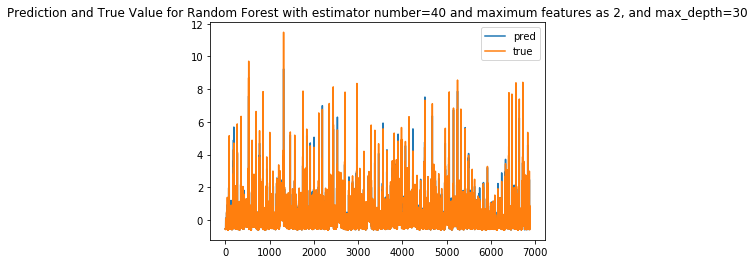

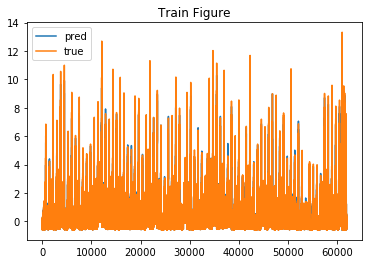

The average RMSE for training is 0.0566515463724704
The average RMSE for validation is 0.13776320080271037
The average OOB of Random Forest model is 0.023248233243570848
When maximum_feature is 3


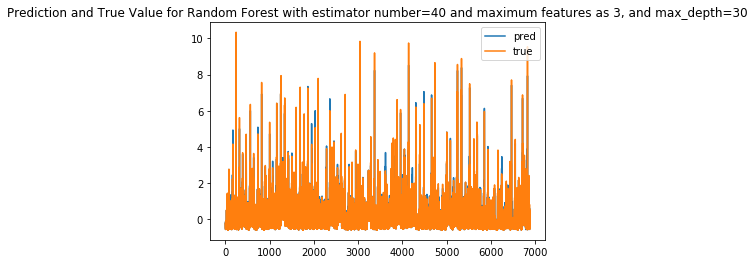

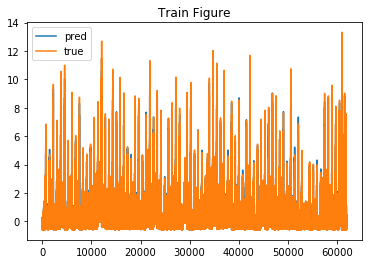

The average RMSE for training is 0.0478589422430014
The average RMSE for validation is 0.11852329320749
The average OOB of Random Forest model is 0.016526007008018484
When maximum_feature is 4


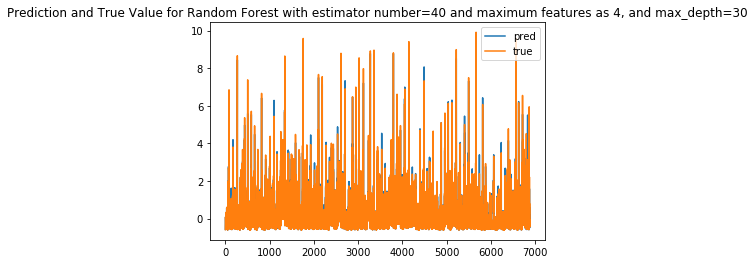

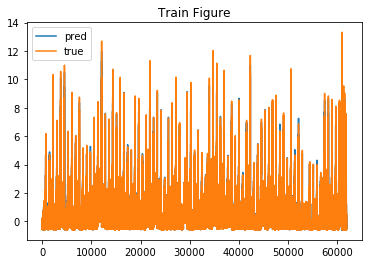

The average RMSE for training is 0.04371819332949291
The average RMSE for validation is 0.10978106834287356
The average OOB of Random Forest model is 0.013665582070071902
When maximum_feature is 5


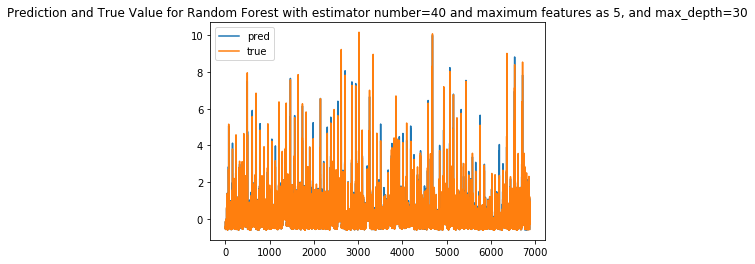

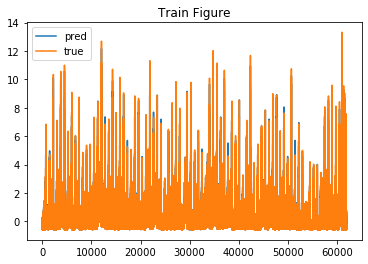

The average RMSE for training is 0.04205100743419048
The average RMSE for validation is 0.10739229462192779
The average OOB of Random Forest model is 0.012698047821335656
When maximum_feature is 6


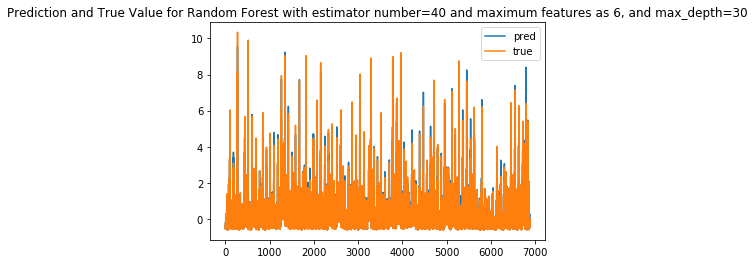

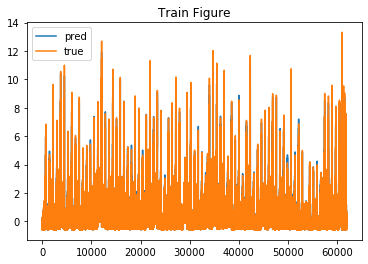

The average RMSE for training is 0.04057140665919802
The average RMSE for validation is 0.10222829240201843
The average OOB of Random Forest model is 0.011808238182234221


Text(0, 0.5, 'RMSE and Error')

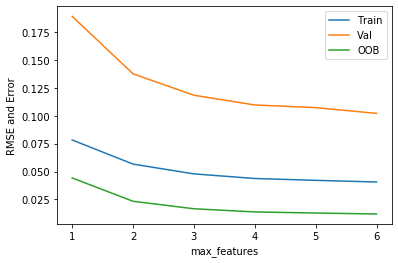

In [23]:
#Maximum Features
max_features=[1,2,3,4,5,6]
RMSE_train=[]
RMSE_val=[]
OOB=[]
for mf in max_features:
    print('When maximum_feature is {}'.format(mf))
    RMSE_train_sub,RMSE_val_sub,OOB_sub=evaluation_randomforest(video_feature_red_withlabel_onehot,40,mf,30)
    RMSE_train.append(RMSE_train_sub)
    RMSE_val.append(RMSE_val_sub)
    OOB.append(OOB_sub)
plt.plot(max_features,RMSE_train)
plt.plot(max_features,RMSE_val)
plt.plot(max_features,OOB)
plt.legend(['Train','Val','OOB'])
plt.xlabel('max_features')
plt.ylabel('RMSE and Error')

When maximum_depth is 1


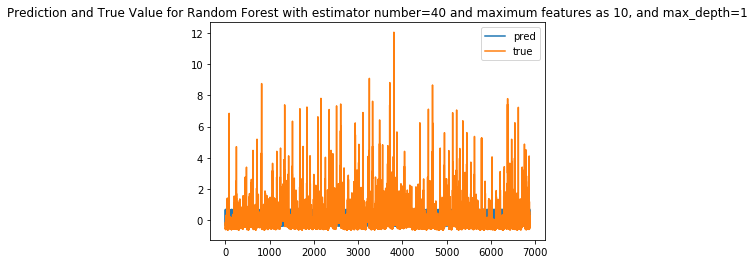

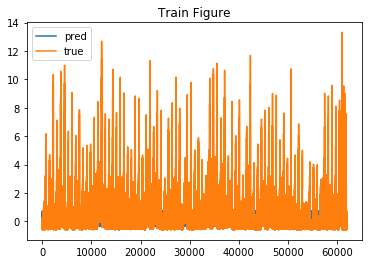

The average RMSE for training is 0.8770209406052683
The average RMSE for validation is 0.8769931794538557
The average OOB of Random Forest model is 0.7699216143286027
When maximum_depth is 5


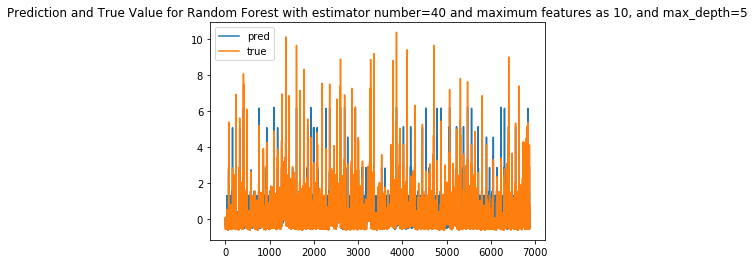

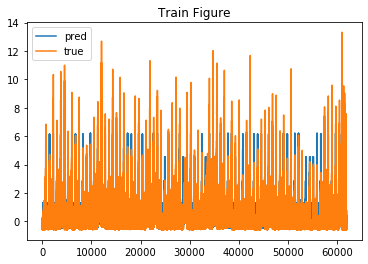

The average RMSE for training is 0.37975746052720527
The average RMSE for validation is 0.3821780735480637
The average OOB of Random Forest model is 0.1465354629296783
When maximum_depth is 10


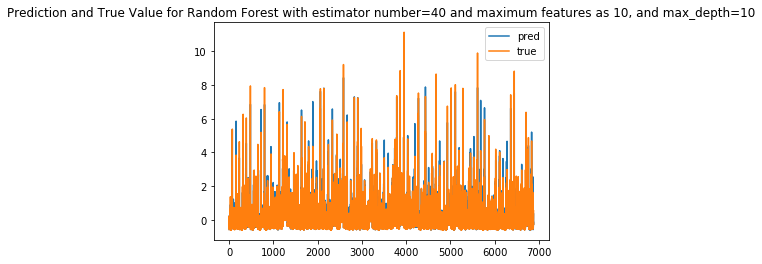

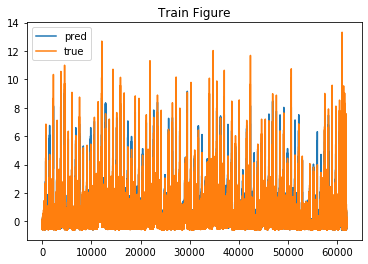

The average RMSE for training is 0.18401801236690501
The average RMSE for validation is 0.2030258231573316
The average OOB of Random Forest model is 0.04215222737433079
When maximum_depth is 20


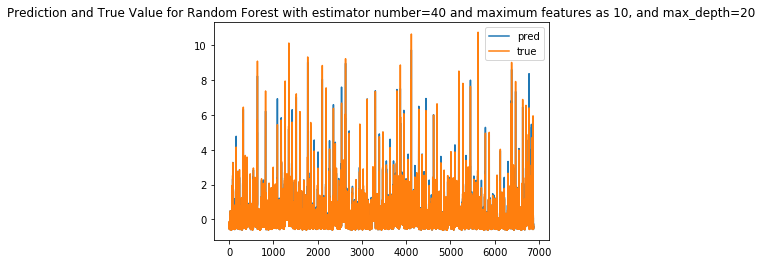

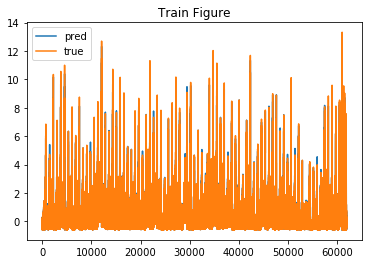

The average RMSE for training is 0.04139040932773149
The average RMSE for validation is 0.1048992190408812
The average OOB of Random Forest model is 0.01213037218085733
When maximum_depth is 30


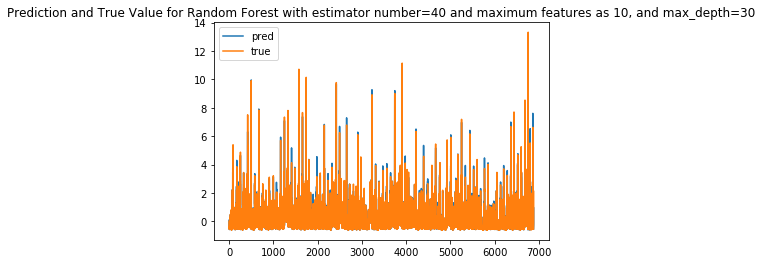

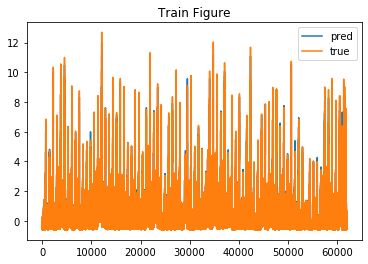

The average RMSE for training is 0.04114787497050992
The average RMSE for validation is 0.1049931990971847
The average OOB of Random Forest model is 0.012151665584236438
When maximum_depth is 40


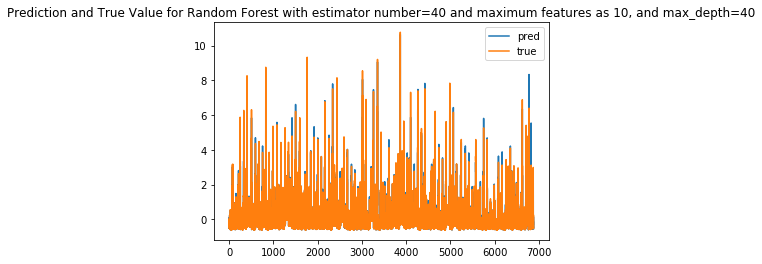

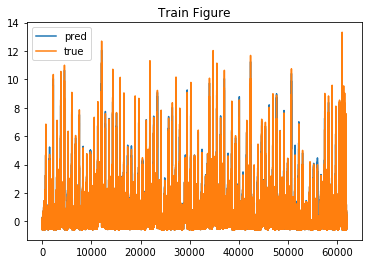

The average RMSE for training is 0.04073163943688776
The average RMSE for validation is 0.10297354177763807
The average OOB of Random Forest model is 0.011877787258034022
When maximum_depth is 50


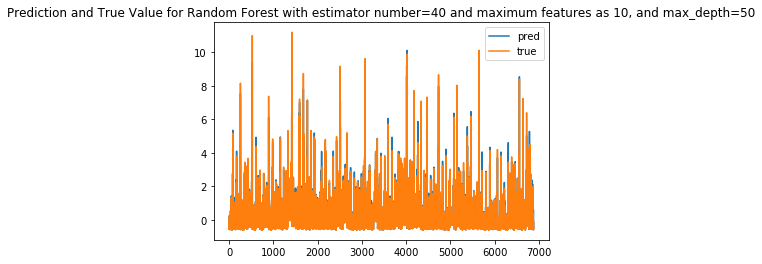

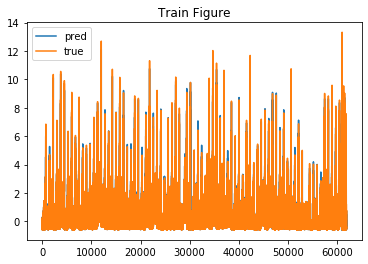

The average RMSE for training is 0.04101936256001139
The average RMSE for validation is 0.10246735536518552
The average OOB of Random Forest model is 0.012044023990440888
When maximum_depth is 60


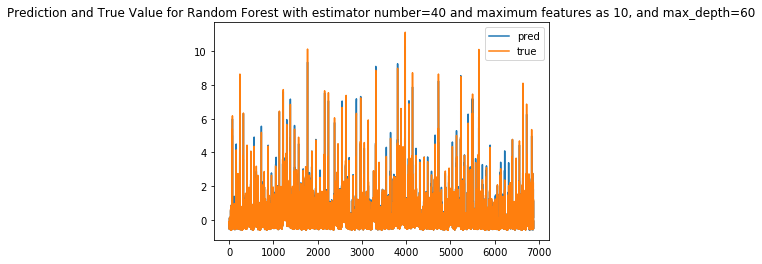

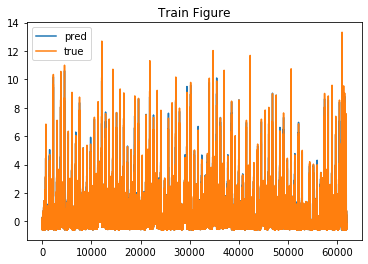

The average RMSE for training is 0.04062741187653157
The average RMSE for validation is 0.10385864106741345
The average OOB of Random Forest model is 0.011914271167570456


Text(0, 0.5, 'RMSE and Error')

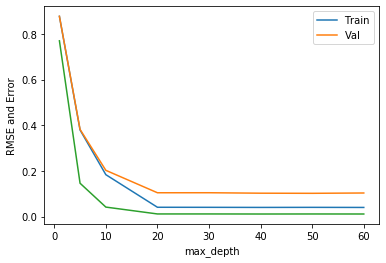

In [25]:
#Maximum Depth
max_depth=[1,5,10,20,30,40,50,60]
RMSE_train=[]
RMSE_val=[]
OOB=[]
for md in max_depth:
    print('When maximum_depth is {}'.format(md))

    RMSE_train_sub,RMSE_val_sub,OOB_sub=    evaluation_randomforest(video_feature_red_withlabel_onehot,40,10,md)
    RMSE_train.append(RMSE_train_sub)
    RMSE_val.append(RMSE_val_sub)
    OOB.append(OOB_sub)
plt.plot(max_depth,RMSE_train)
plt.plot(max_depth,RMSE_val)
plt.plot(max_depth,OOB)
plt.legend(['Train','Val'])
plt.xlabel('max_depth')
plt.ylabel('RMSE and Error')

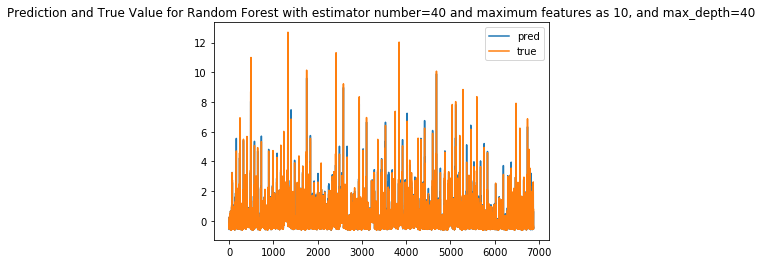

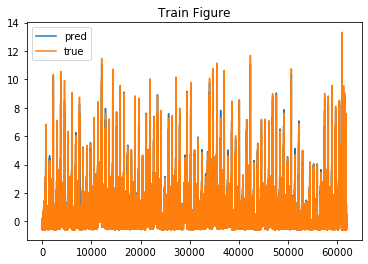

The average RMSE for training is 0.04074182967094446
The average RMSE for validation is 0.10764654691476319
The average OOB of Random Forest model is 0.01192503895955761


In [27]:
#best model configuration evaluation
RMSE_train_sub,RMSE_val_sub,OOB_sub=    evaluation_randomforest(video_feature_red_withlabel_onehot,40,10,40)